In [1]:
#conflict
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import pandas as pd
from pandas import DataFrame as df
from mpld3 import plugins, fig_to_html, save_html, fig_to_dict
from tqdm import tqdm
import numpy as np
import json
from tensorflow.keras.preprocessing.text import text_to_word_sequence
#character, setting
import numpy as np
import gensim
import nltk
import re
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
from nltk.tokenize import sent_tokenize
import multiprocessing
import os
from pathlib import Path
import io
from gensim.models import Phrases
from textblob import TextBlob
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cacki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cacki\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Conflict Ratio Analysis...

In [2]:
# conflocit ratio Analysis...
def conflict(input_text):
    contents = str(input_text)
    token_list_str = text_to_word_sequence(contents) #tokenize

    confict_words_list = ['clash', 'incompatible', 'inconsistent', 'incongruous', 'opposition', 'variance','vary', 'odds', 
                            'differ', 'diverge', 'disagree', 'contrast', 'collide', 'contradictory', 'incompatible', 'conflict',
                            'inconsistent','irreconcilable','incongruous','contrary','opposite','opposing','opposed',
                            'antithetical','clashing','discordant','differing','different','divergent','discrepant',
                            'varying','disagreeing','contrasting','at odds','in opposition','at variance' ]

    count_conflict_list = []
    for i in token_list_str:
        for j in confict_words_list:
            if i == j:
                count_conflict_list.append(j)

    len(count_conflict_list)#한 문장에 들어있는 conflict 단어 수




    list_str = contents.split(".")  #문장별로 분리한다. 분리는 .를 기준으로 한다.   


    listSentiment = []

    sid = SentimentIntensityAnalyzer()

    i=0
    for sentence in tqdm(list_str): #한문장식 가져와서 처리한다.
        ss = sid.polarity_scores(sentence) #긍정, 부정, 중립, 혼합점수 계산
        #print(ss.keys())
        #print('{}: neg:{},neu:{},pos:{},compound:{}'.format(i,ss['neg'],ss['neu'],ss['pos'],ss['compound']))
        #print('{}: neg:{}'.format(i,ss['neg']))
        i +=1
        listSentiment.append([ss['neg'],ss['neu'],ss['pos'],ss['compound']])

    listSentiment
    df = pd.DataFrame(listSentiment)
    df.columns = ['neg', 'neu', 'pos','compound']


    df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0  else 'neg')

    df['comp_score'].value_counts()

    conflict_ratio = df['comp_score'].value_counts(normalize=True) #상대적 비율 계산
    
    return conflict_ratio

In [3]:
text = """His glittered hand reaches for mine, and I swiftly yank my arm back to avoid contact. Hurt momentarily clouds his eyes, but his excitement soon returns once he rejoins the chaos of the parade. As the surrounding clamor of drag queens and rainbow motorcycles drifts into my periphery, a desperate isolation overcomes me. This march is my community's grandest welcome party\u2014the epitome of acceptance\u2014yet why do I feel like an excluded spectator? Shouldn't my rainbow flag also be fluttering in the air, not neatly furled beneath my jacket?My gnawing guilt feels all too familiar. It's what I first experienced when I spotted Jethro, then a freshman, in the school parking lot. While half of me basked in awe of his high heels and rainbow bandana, my other half suffered a creeping discomfort. Dad, expectedly, only expressed the latter.'Look, I know you're different too...but you're not that different right?''No, of course not.''Good.'As having just come out as gay, that fleeting conversation warped my self-perception. It solidified an arbitrary line between acceptable and detestable, leading me struggling to display idealized teenage masculinity. Instead of culinary documentaries, football. Gardening and watercolors became hobbies of history. I knew I succumbed to internalized homophobia, but conformity provided security. I preferred feeling confused and deprived to facing any negativity from expressing myself candidly.Thankfully, Jethro entered my life again\u2014this time on Instagram, where he passionately rebuked discriminatory comments. I attempted a facade of indifference, but subconsciously I resonated with his vulnerability and\u2014surprisingly\u2014courage. When he concluded with 'We have nothing to be sorry for,' I actually started to believe it.That millisecond of empowerment slowly became a feeling I craved. Thus, I ventured into the world of activism, but since my initial anxieties lingered, I remained anonymous. Through storytelling, I connected with others who confronted similar difficulties, writing and sharing blog posts about my social experiences. When my city back-lashed against California's new LGBTQ+-inclusive sexual education curriculum, I interviewed dozens of students on identity to compile their voices into a magazine, weaving together narratives of mental health, sexuality, and self-acceptance. Did it obliterate homophobia? No. But it certainly revealed perspectives that had been suppressed for too long. I was honestly proud of my project, yet I still obscured my name and story due to fear.The blare of horns drags me back to the present, and suddenly, I realize this march might be my final chance to escape hypocrisy and reclaim my activism. I urge others to live freely, but how can I do so when I shudder at the thought of being recognized with a rainbow flag?Here and now, I must accept that being gay does define me. Not as being predisposed to enjoy art and horticulture, but through my journey towards self-acceptance, I have gained a refined sensitivity to the struggles of others. I listen, I understand, and when others are lost, I extend my own experiences to empathize with their hardships. These qualities all contribute to my ability to tell compelling stories, a cornerstone of activism, but detached from their authors, stories are just hollow words. To truly empower others in the future, especially those in silence like I was, I can't shy away from the spotlight. I must let all my readers know that I am a tangible individual who is unashamed to exude my story truthfully.Before releasing my first real 'About Me' blog post, I unzip my jacket and reveal my flag. Uplifted by my thrill of starting a new chapter, my arm reaches higher into the canopy of confetti, and I stare wondrously at the colors rippling above. Finally, I feel no more doubt and no more fear: I break free from the sidelines and joyously clasp the next hand offered.I am a staunch opponent of the belief 'Stick to your passions early.' At best, this advice is idealistic, and at worst, it limits exploration. When I first volunteered as a science instructor at a local elementary school, this dogma was rampant, rigidifying curriculum and intimidating students.As cofounder and Director of Outreach of the non-profit organization Stemnova, I sought to eliminate the walls that suffocated STEM education. By our second year, I grew ambitious. I was determined to take steps to reinvent local perceptions of science bigger than the small fundraisers and science nights we had organized before.Thus, Stemnova partnered with the state Science Olympiad organization to host the first student-run tournament on the West Coast. Although our mission was daunting, I knew it was key to proving to our community that science is not compartmentalized. The competition committee I organized creatively planned each event down to the finest detail. For epidemiology, we incorporated novel computer models; for chemistry, we devised labs inspired by botany and nutritional sciences, and for experimental design, we blended together physics and biology. Each minute of the tournament was a sacred chance to exhibit the applicability and interdisciplinary nature of science.By the invitational's end, it was evident our purpose reached the students - at least half their questions for our professional guest speakers linked together various scientific fields. Though some parents still seemed confused, I was content that we had influenced the minds that mattered the most. The awards ceremony was an revelatory moment. Not only did I recognize the current impacts of my leadership, but I also began to envision what my innovative potential could bring in the future - an unbounded educational landscape. I felt empowered by both the students' excitement and my volunteers' own devotions to materializing something we had initially struggled to define. Our competition was a first for many, and I am still proud of myself and my team for devising an experience that broadened the next generation's understandings and encouraged their once suppressed desire to explore.Like an unscratchable itch, the Finite Heartbeat Theory tugs constantly at my curiosities. Its hypothesis is simple - we have a predetermined number of heartbeats. When my half-pseudoscientist, half-biology teacher first exclaimed this to our class years ago, my seventh-grade self believed it wholeheartedly.By ninth grade, I feared the heart. With Grandpa passing away from a heart attack and my teacher's words still echoing in my head, I viewed the heart as a ticking time bomb. From my apprehension, however, spawned a cautious interest towards cardiology: I was perpetually haunted by the question 'How many heartbeats left?'My concerns brought me into the Priest Laboratory for Pediatric Cardiology through the Stanford Institutes of Medicine Summer Research Program. Hoping to characterize diabetes' effects on prenatal heart development, I dissected fetal hearts and submerged them in toxic, diabetic conditions overnight.The next morning, as I examined the petri dish with a microscope, I could barely grapple with what I saw - the hearts still beat, oblivious to their caustic surroundings. What I once perceived as a doomed organ suddenly transformed into a vessel of resilience. Before, my interest in cardiology was rooted in foreboding, but, now, it stemmed from a newfound appreciation for the heart's endurance despite adversary. My epiphany spawned fresh queries and perspectives. As I reminisced my Grandpa's own passing, I refused to anxiously calculate how many heartbeats he used. Instead, I began to inquire how I could better the lives of my parents, remembering my own father's cardiovascular disease.These questions led me to where I am today, researching pediatric cardiology in the Priest Lab and observing cardiac stem cell therapy in the Wu Lab. Every day, my work, from cultivating cells to evaluating genetic data, is inspired by my faith in the heart's tenacity, and through pursuing cardiology, I have sharpened my experimental acumen and diversified my scientific skillset. Occasionally, I still ponder over the truth of the Finite Heartbeat Theory, but I always arrive at the same conclusion - with limited heartbeats, I better seize opportunity now and fully dedicate myself to understanding the heart's complexity.Since childhood, I have always been fascinated with the Wubble Bubble. It was simple yet entertaining - its tinted surface humorously distorting my friend's whispers as they floated through the ball to my ear. While my Wubble Bubble now remains deflated in my garage, my fascination with bubbles is still very much afloat. Fortunately - or unfortunately as I have come to recognize - I don't have to look far to find one. In fact, I live in one.In middle school, I loved my Bay Area bubble, grateful that it shielded my community's pride parades and cultural celebrations. However, I grew complacent despite the emerging discrimination in our communities. In early 2018 when California released a more progressive sexual education curriculum, I was snapped out of this illusion. Watching the school board meeting livestream, with its homophobic undertones and disregard for mental health, shocked me. That night, I felt anxious yet impassioned. Being gay myself, I was terrified at the thought of being an outcast, but, simultaneously, I was angry that my identity was considered 'inappropriate' to share. A newfound fervor subsequently overtook me, and with my yearbook experience and the design talent of my friend, I sought to create a magazine to highlight the neglected voices of Fremont's youth. We originally intended to only focus on sexuality, but soon after interviewing dozens of students, we broadened our project to illuminate stories of body positivity, depression, stress, and abusive relationships. Titled 'Miscellany,' our magazine both distributed overlooked narratives to an audience and served as an outlet for emotional release for its contributors. It fostered empathy as it circulated in classrooms and homes, and I am still inspired by accounts from my closest friend's brother that less and less students at his elementary school are using once-prevalent homophobic language.Today, frankly, I am not sure how many individuals have flipped through my magazine - maybe hundreds, perhaps thousands. But I do know that even if only one person reads one story, that is still an important step towards spotlighting shrouded perspectives and solidifying the foundations for a more accepting Fremont.The first time I ever heard a recording of my debate speech, it was torture. It was less what I said, but more how I said it. My voice, both nasal and high-pitched, was excruciating to the ear, and immediately, what I once overlooked bolted to the forefront of my insecurities.In high school, with everyone changing, my distinct voice brought along with it belittling stereotypes: each 'What's up with you high voice?' and 'Your voice is gay' cornered me into silence and isolation. Competing in debate only amplified my anxiety, so futilely, I practiced diaphragm stretches and speaking exercises to deepen my voice. These activities were distractions from reading and developing cases, but I committed to them anyway, leading to a tragic string of losses.Junior year, before a national tournament, my voice disappeared. Sounding like a whelping animal during my vocal exercises, my fear quickly evolved into resignation. Since I couldn't speak, I spent my night determinedly researching instead, half hoping that maybe I could win on the premise of knowledge.That weekend, even with my relentless coughing, my partner and I advanced into the top thirty-two. Though we received just a flimsy certificate, it meant so much more to me as it was the first tangible evidence that challenged my insecurities. While my fingers ran along the paper, I realized what had distinguished this tournament was that I had actually focused on something changeable - my knowledge - instead of a constant factor. Before, my self-consciousness blinded me from spotting any actual opportunities for growth.Today, my voice is a reminder of my own resilience and adaptability. From this struggle, I have come to grasp the importance of perspective in learning, that I should focus on malleable factors to propel myself forward. This process of overcoming my linear thinking has influenced me to constantly reevaluate my problems and identify affectable areas of improvement: self-improvement is only achievable through reason and passion. Now, I am no longer concerned about my voice. Instead, I am driven to use it as a powerful tool to better engage my curiosities."},{"index":1,"personal_essay":"To kill or not to kill is a question that has taunted me since June. Where my inner biologist yearned to dissect all the mice in the world (for science, of course), my inner ethicist questioned my sacrifices' purposes. After all, these were living creatures in my hands: what set them so apart from me that justified their role as test subjects?From perusing Peter Singer's Animal Liberation to attending cardiology conferences, answering the same concern from various lenses piqued my passion for bioethics, a synergy of biology, socio-cultural politics, and philosophy. I loved dissections and protein assays, compiling pieces of life's puzzle, but increasingly, I realized my research didn't function in a vacuum. Minutiae, including how we rationally perceive animals, does affect our human-to-human interactions, and the possibility that biology can be ethically improved as a discipline leads me to investigate potential solutions.The College of Arts and Science's Health and Societies major is, essentially, bioethics on steroids. It is one of the only programs I've found that shares my mission to unravel science's moral complexities. I ultimately aspire to be a genetic engineer, a trailblazer in healthcare. However, as the pioneer of gene-editing Jennifer Doudna warns in A Crack in Creation, it is a powerful profession that deserves deep contemplation.For instance, with parents soon being able to edit fetal traits such as autism or sexuality, I can't help but wonder if these efforts are inherently discriminatory. Perhaps, in Modern Biology and Social Implications or Darwin's Legacy, I'll discover some semblance of an answer. Analyzing current events with classmates, such as China's rogue designer-babies, is the best medium for me to examine innovation's social responsibilities. Meanwhile, studying historical Darwinistic theory is key to understanding modern ableism and homophobia. I hope to lob philosophical questions across the room, engage in existential discussions, then translate theory into practice by interning with the Bucan Lab. On the forefront of studying behavioral genetics, I can not only witness firsthand autism research, but also start bioethical conversations with colleagues. I'd like to ask Professor Bucan the safety of gene-editing: how do we ensure altering particular genes won't have any harmful off-target effects?Beyond the University of Pennsylvania's individual opportunities is its commitment to fostering community. The course Culture, Production, and Consumption in the Global Marketplace best embodies this value. On one hand, I'm eager to discuss with peers how healthcare is shaped by consumerism, but on the other, I'd like to listen to their experiences of growing up in a contemporary, capitalistic society. Even better is that we can do all this while exploring Philadelphia, relishing the cuisine and museums of an international city.Furthermore, I dream to bring this element of collective discovery beyond campus. Whether it be the student-run Engineers Without Borders or the International Honors Programs' Health and Community initiative, the University of Pennsylvania's support for worldly scholarship is inspiring. Meshing ethics, bioengineering, and sociology to address global health challenges livens my curiosities, and I seek to investigate how healthcare functions in different sociocultural contexts abroad, specifically its inclusion and exclusion of certain populations. These experiences all contribute to my Health and Societies' senior capstone project: I yearn to unite my extracurriculars and academics by focusing on worldwide queer mental health disparities and possible medical solutions.Biological innovations, such as genetic engineering, address many of our woes, but with new developments comes new moral concerns. More and more, science intersects with philosophy, politics, and culture, and I value majoring in Health and Societies to be conscientious of these crossroads. The University of Pennsylvania's thoughtful and interdisciplinary landscape, thus, beckons me. I dream to join its haven for intellectual reflection, delve into the nuances of scientific advancements, and maybe\u2014if time permits\u2014get back to answering the question to kill or not to kill.How will you explore your intellectual and academic interests at the University of Pennsylvania? Please answer this question given the specific undergraduate school to which you are applying. (400-650 words) Sustainability. A gardener myself, I'm already enamored by Dartmouth's camaraderie with nature. Whether it be bee-keeping with classmates or relaxing in the organic farm alone, each facet of campus is a chance to humble myself, to reaffirm my appreciation for Earth.This self-effacing curiosity pervades Dartmouth's D-Plan. If I'm going to be studying tropical-biology, I'm joining a foreign-study program to gather real samples in Caribbean reefs. If I want to grasp science's role in society, I'm using my sophomore summer to debate peers in Ethics and Information Technology. Dartmouth ultimately fosters a sustainable education: time and learning are never wasted.While arguing a Dartmouth-related case before the U.S. Supreme Court in 1818, Daniel Webster, Class of 1801, delivered this memorable line: 'It is, Sir\u2026a small college. And yet, there are those who love it!' As you seek admission to the Class of 2023, what aspects of the College's program, community or campus environment attract your interest?Jane was commended for being a survivor.Clad in invisible armor, defiant against injustice\u2014that's how we imagined her as her story of sexual assault circulated. We deemed her a hero, nearing superhuman, but\u2014as Jane would confide in me later\u2014not once did our hasty label reflect her struggles honestly.To her, survivor implied that the worst was over, sidelining her depression for a more palatable story of overcoming. Our words weren't ill-intentioned, but certainly, they were ill-informed. I realized we succumbed to a grander cultural problem\u2014one that sentimentalizes and misrepresents sexual assault, discouraging reporting and de-prioritizing long-term care.From volunteering in a rape-counseling center, I've grasped that shaping culture begins with shaping language. Similar to how normalizing gender-neutral pronouns promotes acceptance, how we describe assault must be more inclusive. By exploring Dartmouth's interdisciplinary courses United States of Queer and Inequality and Social Justice, I desire to interrogate with classmates the reforms activism needs to encompass all narratives.Subsequently, under the Student and Presidential Committee on Sexual Assault, I seek to translate theory into justice. Joining peers will not only offer me a platform to cultivate student-administration dialogue, but also resources to pursue solutions for sexual assault's psychological consequences. With an Elizabeth A. Hoffman Research Grant, I can investigate the strengths of differing therapy techniques at Dartmouth's National Center for PTSD, later bringing my findings to the table for debate. How should we improve existing campus mental-health support systems?Sexual assault shouldn't be a tokenized story or glorified narrative. Dartmouth's expressive, multifaceted community is a haven to foster this ideal, to devise the most holistic solutions for sexual violence. I strive to be a better ally for Jane and others, but first I must address our misguided words and assumptions. Therein, however, lies the beauty of language\u2014only discussion rectifies it, not silence.In the aftermath of World War II, Dartmouth President John Sloane Dickey, Class of 1929, proclaimed, 'The world's troubles are your troubles\u2026and there is nothing wrong with the world that better human beings cannot fix.' Which of the world's 'troubles' inspires you to act? How might your course of study at Dartmouth prepare you to address it?My love for collective adventures leads me to Duke. I've traversed Yosemite, scuba-dived with family, but none of these experiences even compare to the excitement of tenting with friends, braving the cold for a taste of athletic thrill. Between games, I'm eager to explore Duke's various social niches. The International Cooking Club shines in particular: I'm giddy to embrace my surrounding diversity and share my own Taiwanese recipes.This love for community extends into academics. As an aspiring cognitive-neurobiologist, the Lemur Center and its tight-knit team of interdisciplinary scientists uniquely appeals to me. Investigating primate biology is the best mechanism for medical research, much more efficient than mice-models. With my previous experience untangling developmental-genetics, I hope to contribute to the center's deciphering of neurodegenerative disease.Every facet of Duke is ultimately a collective adventure. Whether that be chanting Blue Devils! or observing lemurs, I know I'll always be at home.If you are applying to the Trinity College of Arts and Sciences as a first year applicant, please discuss why you consider Duke a good match for you. Is there something particular about Duke that attracts you? (Please limit your response to no more than 150 words.)Jane was commended for being a survivor.Clad in invisible armor and defiant against injustice\u2014that's how we imagined her as her story of sexual assault circulated. We deemed her a hero, nearing superhuman, but\u2014as Jane would confide in me later\u2014not once did our hasty label reflect her struggles honestly.To her, survivor implied that the worst was over. It sidelined her depression for a more palatable story of overcoming. Our words weren't ill-intentioned, but certainly, they were ill-informed. Unknowingly, we succumbed to society's habit of misrepresenting sexual assault, fostering a claustrophobic environment hostile to truth.Some call it nitpicky political-correctness, but shaping culture must begin with shaping language. Survivor versus victim or gender-neutral pronouns seem insignificant, but from volunteering at the rape-counseling center, I've realized these minutiae do matter to vulnerable individuals in my community. Words legitimize our experiences, our identities, and when others abuse or mischaracterize us with them, shame arises. It's when my suffering and tears were once ridiculed as gay, when Jane's narrative was tokenized for public inspiration.For me, however, language's fluidity signifies hope. In my current project with Bay Area Women Against Rape, I embrace engaging law enforcement through creating awareness curriculum to re-evaluate how we address sexual assault. Instead of this what I think, it's what do you prefer?\u2014words should be empathetic tools to empower people to express their own stories. To be a better ally for Jane, myself, and others, I find purpose in molding discourse. Thankfully, only discussion rectifies language, not silence.Duke University seeks a talented, engaged student body that embodies the wide range of human experience; we believe that the diversity of our students makes our community stronger. If you'd like to share a perspective you bring or experiences you've had to help us understand you better-perhaps related to a community you belong to or your family or cultural background-we encourage you to do so. Real people are reading your application, and we want to do our best to understand and appreciate the real people applying to Duke. """

In [4]:
re_conflict = conflict(text)
re_conflict #이 결과를  Plot 계산에 반영

100%|██████████| 194/194 [00:00<00:00, 5558.22it/s]


pos    0.726804
neg    0.273196
Name: comp_score, dtype: float64

## Character ratio analysis...

In [5]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cacki\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
def character(text):

    essay_input_corpus = str(text) #문장입력
    essay_input_corpus = essay_input_corpus.lower()#소문자 변환

    sentences  = sent_tokenize(essay_input_corpus) #문장 토큰화
    total_sentences = len(sentences)#토큰으로 처리된 총 문장 수
    total_words = len(word_tokenize(essay_input_corpus))# 총 단어수
    
    split_sentences = []
    for sentence in sentences:
        processed = re.sub("[^a-zA-Z]"," ", sentence)
        words = processed.split()
        split_sentences.append(words)

    skip_gram = 1
    workers = multiprocessing.cpu_count()
    bigram_transformer = Phrases(split_sentences)

    model = gensim.models.word2vec.Word2Vec(bigram_transformer[split_sentences], workers=workers, sg=skip_gram, min_count=1)

    model.train(split_sentences, total_examples=sum([len(sentence) for sentence in sentences]), epochs=100)
    
    #모델 설계 완료

    #캐릭터 표현하는 단어들을 리스트에 넣어서 필터로 만들고
    character_list = ['i', 'my', 'me', 'mine', 'you', 'your', 'they','them',
                      'yours', 'he','him','his' 'she','her','it','someone','their', 'myself', 'aunt',
                    'brother','cousin','daughter','father','grandchild','granddaughter','granddson','grandfather',
                    'grandmother','great-grandchild','husband','ex-husband','son-in-law', 'daughter-in-law','mother',
                    'niece','nephew','parents','sister','son','stepfather','stepmother','stepdaughter', 'stepson',
                    'twin','uncle','widow','widower','wife','ex-wife']
    
    ####문장에 char_list의 단어들이 있는지 확인하고, 있다면 유사단어를 추출한다.
    #우선 토큰화한다.
    retokenize = RegexpTokenizer("[\w]+") #줄바꿈 제거하여 한줄로 만들고
    token_input_text = retokenize.tokenize(essay_input_corpus)
    #print (token_input_text) #토큰화 처리 확인.. 토큰들이 리스트에 담김
    #리트스로 정리된 개별 토큰을 char_list와 비교해서 존재하는 것만 추출한다.
    filtered_chr_text = []
    for k in token_input_text:
        for j in character_list:
            if k == j:
                filtered_chr_text.append(j)
    
    #print (filtered_chr_text) # 유사단어 비교 추출 완료, 겹치는 단어는 제거하자.
    
    filtered_chr_text_ = set(filtered_chr_text) #중복제거
    filtered_chr_text__ = list(filtered_chr_text_) #다시 리스트로 변환
    #print (filtered_chr_text__) # 중복값 제거 확인
    
    for i in filtered_chr_text__:
        ext_sim_words_key = model.most_similar_cosmul(i) #모델적용
    
    char_total_count = len(filtered_chr_text) # 중복이 제거되지 않은 에세이 총 문장에 사용된 캐릭터 표현 수
    char_count_ = len(filtered_chr_text__) #중복제거된 캐릭터 표현 총 수
        
    result_char_ratio = round(char_total_count/total_words * 100, 2)

    #return result_char_ratio, total_sentences, total_words, char_total_count, char_count_, ext_sim_words_key
    return result_char_ratio

In [7]:
re_character = character(text)
re_character

C:\Users\cacki\anaconda3\envs\py37pytorch\lib\site-packages\ipykernel_launcher.py:53: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


8.57

## Setting

In [8]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cacki\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [9]:
def setting_anaysis(text):

    essay_input_corpus = str(text) #문장입력
    essay_input_corpus = essay_input_corpus.lower()#소문자 변환

    sentences  = sent_tokenize(essay_input_corpus) #문장 토큰화
    total_sentences = len(sentences)#토큰으로 처리된 총 문장 수
    total_words = len(word_tokenize(essay_input_corpus))# 총 단어수
    split_sentences = []
    for sentence in sentences:
        processed = re.sub("[^a-zA-Z]"," ", sentence)
        words = processed.split()
        split_sentences.append(words)

    skip_gram = 1
    workers = multiprocessing.cpu_count()
    bigram_transformer = Phrases(split_sentences)

    model = gensim.models.word2vec.Word2Vec(bigram_transformer[split_sentences], workers=workers, sg=skip_gram, min_count=1)

    model.train(split_sentences, total_examples=sum([len(sentence) for sentence in sentences]), epochs=100)
    
    #모델 설계 완료

    #setting을 표현하는 단어들을 리스트에 넣어서 필터로 만들고
    location_list = ['above', 'behind','below','beside','betweed','by','in','inside','near',
                     'on','over','through']
    time_list = ['after', 'before','by','during','from','on','past','since','through','to','until','upon']
      
    movement_list = ['against','along','down','from','into','off','on','onto','out of','toward','up','upon']
    
    palce_terrain_type_list = ['wood', 'forest', 'copse', 'bush', 'trees', 'stand',
                                'swamp', 'marsh', 'wetland', 'fen', 'bog', 'moor', 'heath', 'fells', 'morass',
                                'jungle', 'rainforest', 'cloud forest','plains', 'fields', 'grass', 'grassland', 
                                'savannah', 'flood plain', 'flats', 'prairie','tundra', 'iceberg', 'glacier', 
                                'snowfields','hills', 'highland,' 'heights', 'plateau', 'badland', 'kame', 'shield',
                                'downs', 'downland', 'ridge', 'ridgeline','hollow,' 'valley',' vale','glen', 'dell',
                                'mountain', 'peak', 'summit', 'rise', 'pass', 'notch', 'crown', 'mount', 'switchback',
                                'furth','canyon', 'cliff', 'bluff,' 'ravine', 'gully', 'gulch', 'gorge',
                                'desert', 'scrub', 'waste', 'wasteland', 'sands', 'dunes',
                                'volcano', 'crater', 'cone', 'geyser', 'lava fields']
    
    water_list = ['ocean', 'sea', 'coast', 'beach', 'shore', 'strand','bay', 'port', 'harbour', 'fjord', 'vike',
                  'cove', 'shoals', 'lagoon', 'firth', 'bight', 'sound', 'strait', 'gulf', 'inlet', 'loch', 
                  'bayou','dock', 'pier', 'anchorage', 'jetty', 'wharf', 'marina', 'landing', 'mooring', 'berth', 
                  'quay', 'staith','river', 'stream', 'creek', 'brook', 'waterway', 'rill','delta', 'bank', 'runoff',
                  'channel', 'bend', 'meander', 'backwater','lake', 'pool', 'pond', 'dugout', 'fountain', 'spring', 
                  'watering-hole', 'oasis','well', 'cistern', 'reservoir','waterfall', 'falls', 'rapids', 'cataract', 
                  'cascade','bridge', 'crossing', 'causeway', 'viaduct', 'aquaduct', 'ford', 'ferry','dam', 'dike', 
                  'bar', 'canal', 'ditch','peninsula', 'isthmus', 'island', 'isle', 'sandbar', 'reef', 'atoll', 
                  'archipelago', 'cay','shipwreck', 'derelict']
    
    
    outdoor_places_list = ['clearing', 'meadow', 'grove', 'glade', 'fairy ring','earldom', 'fief', 'shire',
                            'ruin', 'acropolis', 'desolation', 'remnant', 'remains',
                            'henge', 'cairn', 'circle', 'mound', 'barrow', 'earthworks', 'petroglyphs',
                            'lookout', 'aerie', 'promontory', 'outcropping', 'ledge', 'overhang', 'mesa', 'butte',
                            'outland', 'outback', 'territory', 'reaches', 'wild', 'wilderness', 'expanse',
                            'view', 'vista', 'tableau', 'spectacle', 'landscape', 'seascape', 'aurora', 'landmark',
                            'battlefield', 'trenches', 'gambit', 'folly', 'conquest', 'claim', 'muster', 'post',
                            'path', 'road', 'track', 'route', 'highway', 'way', 'trail', 'lane', 'thoroughfare', 'pike',
                            'alley', 'street', 'avenue', 'boulevard', 'promenade', 'esplande', 'boardwalk',
                            'crossroad', 'junction', 'intersection', 'turn', 'corner','plaza', 'terrace', 'square', 
                            'courtyard', 'court', 'park', 'marketplace', 'bazaar', 'fairground','realm', 'land', 'country',
                            'nation', 'state', 'protectorate', 'empire', 'kingdom', 'principality','domain', 'dominion',
                            'demesne', 'province', 'county', 'duchy', 'barony', 'baronetcy', 'march', 'canton']

    
    underground_list = ['pit', 'hole', 'abyss', 'sinkhole', 'crack', 'chasm', 'scar', 'rift', 'trench', 'fissure',
                        'cavern', 'cave', 'gallery', 'grotto', 'karst',
                        'mine', 'quarry', 'shaft', 'vein','graveyard', 'cemetery',
                        'darkness', 'shadow', 'depths', 'void','maze', 'labyrinth'
                        'tomb', 'grave', 'crypt', 'sepulchre', 'mausoleum', 'ossuary', 'boneyard']
                        
    living_places_list = ['nest', 'burrow', 'lair', 'den', 'bolt-hole', 'warren', 'roost', 'rookery', 'hibernaculum',
                         'home', 'rest', 'hideout', 'hideaway', 'retreat', 'resting-place', 'safehouse', 'sanctuary',
                         'respite', 'lodge','slum', 'shantytown', 'ghetto','camp', 'meeting place,' 'bivouac', 'campsite', 
                         'encampment','tepee', 'tent', 'wigwam', 'shelter', 'lean-to', 'yurt','house', 'mansion', 'estate',
                         'villa','hut', 'palace', 'outbuilding', 'shack tenement', 'hovel', 'manse', 'manor', 'longhouse',
                         'cottage', 'cabin','parsonage', 'rectory', 'vicarge', 'friary', 'priory','abbey', 'monastery', 
                         'nunnery', 'cloister', 'convent', 'hermitage','castle', 'keep', 'fort', 'fortress', 'citadel', 
                         'bailey', 'motte', 'stronghold', 'hold', 'chateau', 'outpost', 'redoubt',
                         'town', 'village', 'hamlet', 'city', 'metropolis','settlement', 'commune']

    building_facilities_list = ['temple', 'shrine', 'church', 'cathedral', 'tabernacle', 'ark', 'sanctum', 'parish', 'university',
                                'chapel', 'synagogue', 'mosque','pyramid', 'ziggurat', 'prison', 'jail', 'dungeon',
                                'oubliette', 'hospital', 'hospice', 'stocks', 'gallows','asylum', 'madhouse', 'bedlam',
                                'vault', 'treasury', 'warehouse', 'cellar', 'relicry', 'repository',
                                'barracks', 'armoury','sewer', 'gutter', 'catacombs', 'dump', 'middens', 'pipes', 'baths', 'heap',
                                'mill', 'windmill', 'sawmill', 'smithy', 'forge', 'workshop', 'brickyard', 'shipyard', 'forgeworks',
                                'foundry','bakery', 'brewery', 'almshouse', 'counting house', 'courthouse', 'apothecary', 'haberdashery', 'cobbler',
                                'garden', 'menagerie', 'zoo', 'aquarium', 'terrarium', 'conservatory', 'lawn', 'greenhouse',
                                'farm', 'orchard', 'vineyard', 'ranch', 'apiary', 'farmstead', 'homestead',
                                'pasture', 'commons', 'granary', 'silo', 'crop','barn', 'stable', 'pen', 'kennel', 'mews', 'hutch', 
                                'pound', 'coop', 'stockade', 'yard', 'lumber yard','tavern', 'inn', 'pub', 'brothel', 'whorehouse',
                                'cathouse', 'discotheque','lighthouse', 'beacon','amphitheatre', 'colosseum', 'stadium', 'arena', 
                                'circus','academy', 'university', 'campus', 'college', 'library', 'scriptorium', 'laboratory', 
                                'observatory', 'museum']
    
    
    architecture_list = ['hall', 'chamber', 'room','nave', 'aisle', 'vestibule',
                        'antechamber', 'chantry', 'pulpit','dome', 'arch', 'colonnade',
                        'stair', 'ladder', 'climb', 'ramp', 'steps',
                        'portal', 'mouth', 'opening', 'door', 'gate', 'entrance', 'maw',
                        'tunnel', 'passage', 'corridor', 'hallway', 'chute', 'slide', 'tube', 'trapdoor',
                        'tower', 'turret', 'belfry','wall', 'fortifications', 'ramparts', 'pallisade', 'battlements',
                        'portcullis', 'barbican','throne room', 'ballroom','roof', 'rooftops', 'chimney', 'attic',
                        'loft', 'gable', 'eaves', 'belvedere','balcony', 'balustrade', 'parapet', 'walkway', 'catwalk',
                        'pavillion', 'pagoda', 'gazebo','mirror', 'glass', 'mere','throne', 'seat', 'dais',
                        'pillar', 'column', 'stone', 'spike', 'rock', 'megalith', 'menhir', 'dolmen', 'obelisk',
                        'statue', 'giant', 'head', 'arm', 'leg', 'body', 'chest', 'body', 'face', 'visage', 'gargoyle', 'grotesque',
                        'fire', 'flame', 'bonfire', 'hearth', 'fireplace', 'furnace', 'stove','window', 'grate', 'peephole', 
                        'arrowslit', 'slit', 'balistraria', 'lancet', 'aperture', 'dormerl']
    
    
    setting_words_filter_list = location_list + time_list + movement_list + palce_terrain_type_list + water_list + outdoor_places_list + underground_list + underground_list + living_places_list + building_facilities_list + architecture_list

    
    ####문장에 setting_words_filter_list의 단어들이 있는지 확인하고, 있다면 유사단어를 추출한다.
    #우선 토큰화한다.
    retokenize = RegexpTokenizer("[\w]+") #줄바꿈 제거하여 한줄로 만들고
    token_input_text = retokenize.tokenize(essay_input_corpus)
    #print (token_input_text) #토큰화 처리 확인.. 토큰들이 리스트에 담김
    #리트스로 정리된 개별 토큰을 char_list와 비교해서 존재하는 것만 추출한다.
    filtered_setting_text = []
    for k in token_input_text:
        for j in setting_words_filter_list:
            if k == j:
                filtered_setting_text.append(j)
    
    #print (filtered_chr_text) # 유사단어 비교 추출 완료, 겹치는 단어는 제거하자.
    
    filtered_setting_text_ = set(filtered_setting_text) #중복제거
    filtered_setting_text__ = list(filtered_setting_text_) #다시 리스트로 변환
    print (filtered_setting_text__) # 중복값 제거 확인
    
    for i in filtered_setting_text__:
        ext_setting_sim_words_key = model.most_similar_cosmul(i) #모델적용
    
    setting_total_count = len(filtered_setting_text) # 중복이 제거되지 않은 에세이 총 문장에 사용된 setting 표현 수
    setting_count_ = len(filtered_setting_text__) #중복제거된 setting표현 총 수
        
    result_setting_words_ratio = round(setting_total_count/total_words * 100, 2)
    return result_setting_words_ratio, total_sentences, total_words, setting_total_count, setting_count_, ext_setting_sim_words_key

In [10]:
setting_anaysis(text) # 문장에서 키워드와 관련된 단어을 모두 추출하면 이런 결과가 나옴, 이 결과를 모두 합쳐서 setting 총 값 계산해서 숫자로 출력

['body', 'campus', 'in', 'landscape', 'up', 'after', 'arm', 'over', 'mine', 'down', 'farm', 'home', 'through', 'post', 'before', 'room', 'above', 'along', 'during', 'since', 'college', 'head', 'city', 'against', 'from', 'state', 'on', 'into', 'to', 'court', 'march', 'by', 'crack', 'reaches', 'off', 'university', 'steps', 'bay', 'fields', 'coast', 'laboratory', 'remains', 'marketplace']


C:\Users\cacki\anaconda3\envs\py37pytorch\lib\site-packages\ipykernel_launcher.py:138: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


(9.3,
 156,
 4247,
 395,
 43,
 [('consumption', 0.9834907650947571),
  ('value', 0.9677033424377441),
  ('production', 0.9673752188682556),
  ('global', 0.955172061920166),
  ('embodies', 0.9387938976287842),
  ('majoring', 0.9186022281646729),
  ('best', 0.9068793058395386),
  ('culture', 0.8906014561653137),
  ('politics', 0.8880037665367126),
  ('primate', 0.8868656754493713)])

In [11]:
df = setting_anaysis((text))
df_ = pd.DataFrame(df, index = [
                                'setting ratio','total sentences', 'toral words', 'setting_total_count',
                                'ext_setting_words_no', 'ext_setting_sim_words_samples'
                                ], columns = ['Value']
                  )
df_ # 이 겨래과에서는 92라는 숫자만 의미가 있지 >>> 총 문장에 setting를 표현한 수가 총 몇개인지 추출한 결과            

['body', 'campus', 'in', 'landscape', 'up', 'after', 'arm', 'over', 'mine', 'down', 'farm', 'home', 'through', 'post', 'before', 'room', 'above', 'along', 'during', 'since', 'college', 'head', 'city', 'against', 'from', 'state', 'on', 'into', 'to', 'court', 'march', 'by', 'crack', 'reaches', 'off', 'university', 'steps', 'bay', 'fields', 'coast', 'laboratory', 'remains', 'marketplace']


C:\Users\cacki\anaconda3\envs\py37pytorch\lib\site-packages\ipykernel_launcher.py:138: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


,Value
setting ratio,9.3
total sentences,156
toral words,4247
setting_total_count,395
ext_setting_words_no,43
ext_setting_sim_words_samples,"[(consumption, 0.9834907650947571), (value, 0...."


##  paragraph(문단)을 나누려면, 핵심주제어를 추출하고, 주제어가 포함된 문장과 주제어와 연관된 문장을 찾아서 모두 추출한다.
## 문장은 순서대로 추출하면서 핵심 주제어가 포함된 문장으로 구분지으면 문단이 구분된다.

In [12]:
# 핵심주제어를 추출한다.
# 추출한 핵심주제어가 포함된 문장을 모두 추출한다.
# 주제어와 연관성이 있는 단어들(유사어)도 추출한다.유사어가 있는 문장도 추출한다.
# 추출한 문장을 주제어별로 분류한다. 분류는 3개로 제한한다.
# 가장 먼저 추출된 문단(paragraph)이 intro - body - conclusion이 된다. 

In [13]:
#핵심주제어 추출
#TEXTRANK BASED KEYWORD EXTRACTION

from collections import OrderedDict
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

import en_core_web_lg
nlp = en_core_web_lg.load()

In [14]:
#!pip install -U spacy
#!python -m spacy download en_core_web_lg

In [15]:
class TextRank4Keyword():
    """Extract keywords from text"""
    
    def __init__(self):
        self.d = 0.85 # damping coefficient, usually is .85
        self.min_diff = 1e-5 # convergence threshold
        self.steps = 10 # iteration steps
        self.node_weight = None # save keywords and its weight

    
    def set_stopwords(self, stopwords):  
        """Set stop words"""
        for word in STOP_WORDS.union(set(stopwords)):
            lexeme = nlp.vocab[word]
            lexeme.is_stop = True
    
    def sentence_segment(self, doc, candidate_pos, lower):
        """Store those words only in cadidate_pos"""
        sentences = []
        for sent in doc.sents:
            selected_words = []
            for token in sent:
                # Store words only with cadidate POS tag
                if token.pos_ in candidate_pos and token.is_stop is False:
                    if lower is True:
                        selected_words.append(token.text.lower())
                    else:
                        selected_words.append(token.text)
            sentences.append(selected_words)
        return sentences
        
    def get_vocab(self, sentences):
        """Get all tokens"""
        vocab = OrderedDict()
        i = 0
        for sentence in sentences:
            for word in sentence:
                if word not in vocab:
                    vocab[word] = i
                    i += 1
        return vocab
    
    def get_token_pairs(self, window_size, sentences):
        """Build token_pairs from windows in sentences"""
        token_pairs = list()
        for sentence in sentences:
            for i, word in enumerate(sentence):
                for j in range(i+1, i+window_size):
                    if j >= len(sentence):
                        break
                    pair = (word, sentence[j])
                    if pair not in token_pairs:
                        token_pairs.append(pair)
        return token_pairs
        
    def symmetrize(self, a):
        return a + a.T - np.diag(a.diagonal())
    
    def get_matrix(self, vocab, token_pairs):
        """Get normalized matrix"""
        # Build matrix
        vocab_size = len(vocab)
        g = np.zeros((vocab_size, vocab_size), dtype='float')
        for word1, word2 in token_pairs:
            i, j = vocab[word1], vocab[word2]
            g[i][j] = 1
            
        # Get Symmeric matrix
        g = self.symmetrize(g)
        
        # Normalize matrix by column
        norm = np.sum(g, axis=0)
        g_norm = np.divide(g, norm, where=norm!=0) # this is ignore the 0 element in norm
        
        return g_norm

    
    def get_keywords(self, number=10):

        keyword_key = ""
    

        """Print top number keywords"""
        node_weight = OrderedDict(sorted(self.node_weight.items(), key=lambda t: t[1], reverse=True))
        for i, (key, value) in enumerate(node_weight.items()):
            print(key + ' - ' + str(value))
            
            keyword_key = str(keyword_key) + "," + str(key)
            if i > number:
                break
        
        print(keyword_key)
        return keyword_key
        
        
    def analyze(self, text, 
                candidate_pos=['NOUN', 'PROPN'], 
                window_size=4, lower=False, stopwords=list()):
        """Main function to analyze text"""
        
        # Set stop words
        self.set_stopwords(stopwords)
        
        # Pare text by spaCy
        doc = nlp(text)
        
        # Filter sentences
        sentences = self.sentence_segment(doc, candidate_pos, lower) # list of list of words
        
        # Build vocabulary
        vocab = self.get_vocab(sentences)
        
        # Get token_pairs from windows
        token_pairs = self.get_token_pairs(window_size, sentences)
        
        # Get normalized matrix
        g = self.get_matrix(vocab, token_pairs)
        
        # Initionlization for weight(pagerank value)
        pr = np.array([1] * len(vocab))
        
        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr = (1-self.d) + self.d * np.dot(g, pr)
            if abs(previous_pr - sum(pr))  < self.min_diff:
                break
            else:
                previous_pr = sum(pr)

        # Get weight for each node
        node_weight = dict()
        for word, index in vocab.items():
            node_weight[word] = pr[index]
        
        self.node_weight = node_weight


In [16]:
def keywordsExtraction(text) :
   

    tr4w = TextRank4Keyword()
    tr4w.analyze(text, candidate_pos = ['NOUN', 'PROPN'], window_size=4, lower=False)
    
    keyword_key = ""

    """Print top number keywords"""
    node_weight = OrderedDict(sorted(tr4w.node_weight.items(), key=lambda t: t[1], reverse=True))
    list_keyword_key = []
    for i, (key, value) in enumerate(node_weight.items()):
        #print(key + ' - ' + str(value))
        
        # keyword_key = str(keyword_key) + "," + str(key)
        list_keyword_key.append(str(key))
        
        if i > 3:
            break
    
    
    
    print(list_keyword_key)
    return list_keyword_key

In [17]:
#핵심주제어 추출
topic = keywordsExtraction(text)
topic

['Dartmouth', 'community', 'heart', 'science', 'self']


['Dartmouth', 'community', 'heart', 'science', 'self']

In [18]:
#핵심주제어가 포함된 문장 추출
def findSentence(fileName, findText):

    result = []
    data = fileName
    data = data.splitlines()

    for line in data:
        sentences = line.split(". ")
        for sentence in sentences:
            sentence = sentence.strip(".")
            if findText in sentence:
                result.append(sentence + ".")

    return result

In [19]:
###### 각 문장이 전체 문단에서 어디에 위치해 있는지 확인하기
#문장을 비교해서 있으면 1, 없으면 0으로 표시하여 리스트로 반환

#우선 모든 문장을 데이터프레임에 .로 분리해서 넣기
def all_text_to_dataframe(text_input_):
    result_ = []
    data = text_input_
    data = data.splitlines()
    
    for line in data:
        sentences = line.split(".")
        result_.append(sentences)
    return result_

In [20]:
#모든 문장을 Datafrmae에 넣고 인덱스로 처리
all_df = pd.DataFrame(all_text_to_dataframe(text))
all_sentences_df = all_df.transpose() #행렬 변환
all_sentences_df.columns =["Sentences"] # columns =["Sentences"] 추가
all_sentences_df #결과확인

,Sentences
0,"His glittered hand reaches for mine, and I swi..."
1,"Hurt momentarily clouds his eyes, but his exc..."
2,As the surrounding clamor of drag queens and ...
3,This march is my community's grandest welcome...
4,It's what I first experienced when I spotted ...
...,...
189,"Thankfully, only discussion rectifies languag..."
190,"Duke University seeks a talented, engaged stud..."
191,If you'd like to share a perspective you brin...
192,"Real people are reading your application, and..."


In [21]:
topic

['Dartmouth', 'community', 'heart', 'science', 'self']

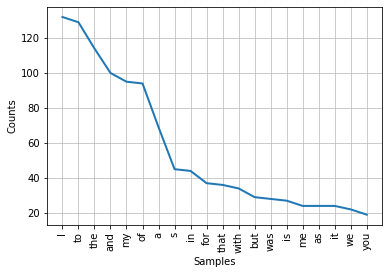

In [22]:
#가장 많이 사용된 단어 파악
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")

from nltk import Text
text = Text(retokenize.tokenize(text))
text.plot(20)
plt.show()

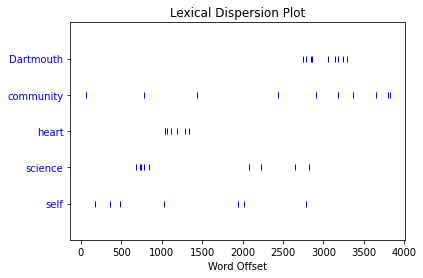

In [23]:
text.dispersion_plot(topic)
#토픽별로 어떤 위치에 얼마나 토픽단어가 사용되었는지 파악

#생각해 볼 것 : 토픽 단어 사용량, 단어 분포량, 토픽과의 관계 망(그래프)

In [60]:
text = """His glittered hand reaches for mine, and I swiftly yank my arm back to avoid contact. Hurt momentarily clouds his eyes, but his excitement soon returns once he rejoins the chaos of the parade. As the surrounding clamor of drag queens and rainbow motorcycles drifts into my periphery, a desperate isolation overcomes me. This march is my community's grandest welcome party\u2014the epitome of acceptance\u2014yet why do I feel like an excluded spectator? Shouldn't my rainbow flag also be fluttering in the air, not neatly furled beneath my jacket?My gnawing guilt feels all too familiar. It's what I first experienced when I spotted Jethro, then a freshman, in the school parking lot. While half of me basked in awe of his high heels and rainbow bandana, my other half suffered a creeping discomfort. Dad, expectedly, only expressed the latter.'Look, I know you're different too...but you're not that different right?''No, of course not.''Good.'As having just come out as gay, that fleeting conversation warped my self-perception. It solidified an arbitrary line between acceptable and detestable, leading me struggling to display idealized teenage masculinity. Instead of culinary documentaries, football. Gardening and watercolors became hobbies of history. I knew I succumbed to internalized homophobia, but conformity provided security. I preferred feeling confused and deprived to facing any negativity from expressing myself candidly.Thankfully, Jethro entered my life again\u2014this time on Instagram, where he passionately rebuked discriminatory comments. I attempted a facade of indifference, but subconsciously I resonated with his vulnerability and\u2014surprisingly\u2014courage. When he concluded with 'We have nothing to be sorry for,' I actually started to believe it.That millisecond of empowerment slowly became a feeling I craved. Thus, I ventured into the world of activism, but since my initial anxieties lingered, I remained anonymous. Through storytelling, I connected with others who confronted similar difficulties, writing and sharing blog posts about my social experiences. When my city back-lashed against California's new LGBTQ+-inclusive sexual education curriculum, I interviewed dozens of students on identity to compile their voices into a magazine, weaving together narratives of mental health, sexuality, and self-acceptance. Did it obliterate homophobia? No. But it certainly revealed perspectives that had been suppressed for too long. I was honestly proud of my project, yet I still obscured my name and story due to fear.The blare of horns drags me back to the present, and suddenly, I realize this march might be my final chance to escape hypocrisy and reclaim my activism. I urge others to live freely, but how can I do so when I shudder at the thought of being recognized with a rainbow flag?Here and now, I must accept that being gay does define me. Not as being predisposed to enjoy art and horticulture, but through my journey towards self-acceptance, I have gained a refined sensitivity to the struggles of others. I listen, I understand, and when others are lost, I extend my own experiences to empathize with their hardships. These qualities all contribute to my ability to tell compelling stories, a cornerstone of activism, but detached from their authors, stories are just hollow words. To truly empower others in the future, especially those in silence like I was, I can't shy away from the spotlight. I must let all my readers know that I am a tangible individual who is unashamed to exude my story truthfully.Before releasing my first real 'About Me' blog post, I unzip my jacket and reveal my flag. Uplifted by my thrill of starting a new chapter, my arm reaches higher into the canopy of confetti, and I stare wondrously at the colors rippling above. Finally, I feel no more doubt and no more fear: I break free from the sidelines and joyously clasp the next hand offered.I am a staunch opponent of the belief 'Stick to your passions early.' At best, this advice is idealistic, and at worst, it limits exploration. When I first volunteered as a science instructor at a local elementary school, this dogma was rampant, rigidifying curriculum and intimidating students.As cofounder and Director of Outreach of the non-profit organization Stemnova, I sought to eliminate the walls that suffocated STEM education. By our second year, I grew ambitious. I was determined to take steps to reinvent local perceptions of science bigger than the small fundraisers and science nights we had organized before.Thus, Stemnova partnered with the state Science Olympiad organization to host the first student-run tournament on the West Coast. Although our mission was daunting, I knew it was key to proving to our community that science is not compartmentalized. The competition committee I organized creatively planned each event down to the finest detail. For epidemiology, we incorporated novel computer models; for chemistry, we devised labs inspired by botany and nutritional sciences, and for experimental design, we blended together physics and biology. Each minute of the tournament was a sacred chance to exhibit the applicability and interdisciplinary nature of science.By the invitational's end, it was evident our purpose reached the students - at least half their questions for our professional guest speakers linked together various scientific fields. Though some parents still seemed confused, I was content that we had influenced the minds that mattered the most. The awards ceremony was an revelatory moment. Not only did I recognize the current impacts of my leadership, but I also began to envision what my innovative potential could bring in the future - an unbounded educational landscape. I felt empowered by both the students' excitement and my volunteers' own devotions to materializing something we had initially struggled to define. Our competition was a first for many, and I am still proud of myself and my team for devising an experience that broadened the next generation's understandings and encouraged their once suppressed desire to explore.Like an unscratchable itch, the Finite Heartbeat Theory tugs constantly at my curiosities. Its hypothesis is simple - we have a predetermined number of heartbeats. When my half-pseudoscientist, half-biology teacher first exclaimed this to our class years ago, my seventh-grade self believed it wholeheartedly.By ninth grade, I feared the heart. With Grandpa passing away from a heart attack and my teacher's words still echoing in my head, I viewed the heart as a ticking time bomb. From my apprehension, however, spawned a cautious interest towards cardiology: I was perpetually haunted by the question 'How many heartbeats left?'My concerns brought me into the Priest Laboratory for Pediatric Cardiology through the Stanford Institutes of Medicine Summer Research Program. Hoping to characterize diabetes' effects on prenatal heart development, I dissected fetal hearts and submerged them in toxic, diabetic conditions overnight.The next morning, as I examined the petri dish with a microscope, I could barely grapple with what I saw - the hearts still beat, oblivious to their caustic surroundings. What I once perceived as a doomed organ suddenly transformed into a vessel of resilience. Before, my interest in cardiology was rooted in foreboding, but, now, it stemmed from a newfound appreciation for the heart's endurance despite adversary. My epiphany spawned fresh queries and perspectives. As I reminisced my Grandpa's own passing, I refused to anxiously calculate how many heartbeats he used. Instead, I began to inquire how I could better the lives of my parents, remembering my own father's cardiovascular disease.These questions led me to where I am today, researching pediatric cardiology in the Priest Lab and observing cardiac stem cell therapy in the Wu Lab. Every day, my work, from cultivating cells to evaluating genetic data, is inspired by my faith in the heart's tenacity, and through pursuing cardiology, I have sharpened my experimental acumen and diversified my scientific skillset. Occasionally, I still ponder over the truth of the Finite Heartbeat Theory, but I always arrive at the same conclusion - with limited heartbeats, I better seize opportunity now and fully dedicate myself to understanding the heart's complexity.Since childhood, I have always been fascinated with the Wubble Bubble. It was simple yet entertaining - its tinted surface humorously distorting my friend's whispers as they floated through the ball to my ear. While my Wubble Bubble now remains deflated in my garage, my fascination with bubbles is still very much afloat. Fortunately - or unfortunately as I have come to recognize - I don't have to look far to find one. In fact, I live in one.In middle school, I loved my Bay Area bubble, grateful that it shielded my community's pride parades and cultural celebrations. However, I grew complacent despite the emerging discrimination in our communities. In early 2018 when California released a more progressive sexual education curriculum, I was snapped out of this illusion. Watching the school board meeting livestream, with its homophobic undertones and disregard for mental health, shocked me. That night, I felt anxious yet impassioned. Being gay myself, I was terrified at the thought of being an outcast, but, simultaneously, I was angry that my identity was considered 'inappropriate' to share. A newfound fervor subsequently overtook me, and with my yearbook experience and the design talent of my friend, I sought to create a magazine to highlight the neglected voices of Fremont's youth. We originally intended to only focus on sexuality, but soon after interviewing dozens of students, we broadened our project to illuminate stories of body positivity, depression, stress, and abusive relationships. Titled 'Miscellany,' our magazine both distributed overlooked narratives to an audience and served as an outlet for emotional release for its contributors. It fostered empathy as it circulated in classrooms and homes, and I am still inspired by accounts from my closest friend's brother that less and less students at his elementary school are using once-prevalent homophobic language.Today, frankly, I am not sure how many individuals have flipped through my magazine - maybe hundreds, perhaps thousands. But I do know that even if only one person reads one story, that is still an important step towards spotlighting shrouded perspectives and solidifying the foundations for a more accepting Fremont.The first time I ever heard a recording of my debate speech, it was torture. It was less what I said, but more how I said it. My voice, both nasal and high-pitched, was excruciating to the ear, and immediately, what I once overlooked bolted to the forefront of my insecurities.In high school, with everyone changing, my distinct voice brought along with it belittling stereotypes: each 'What's up with you high voice?' and 'Your voice is gay' cornered me into silence and isolation. Competing in debate only amplified my anxiety, so futilely, I practiced diaphragm stretches and speaking exercises to deepen my voice. These activities were distractions from reading and developing cases, but I committed to them anyway, leading to a tragic string of losses.Junior year, before a national tournament, my voice disappeared. Sounding like a whelping animal during my vocal exercises, my fear quickly evolved into resignation. Since I couldn't speak, I spent my night determinedly researching instead, half hoping that maybe I could win on the premise of knowledge.That weekend, even with my relentless coughing, my partner and I advanced into the top thirty-two. Though we received just a flimsy certificate, it meant so much more to me as it was the first tangible evidence that challenged my insecurities. While my fingers ran along the paper, I realized what had distinguished this tournament was that I had actually focused on something changeable - my knowledge - instead of a constant factor. Before, my self-consciousness blinded me from spotting any actual opportunities for growth.Today, my voice is a reminder of my own resilience and adaptability. From this struggle, I have come to grasp the importance of perspective in learning, that I should focus on malleable factors to propel myself forward. This process of overcoming my linear thinking has influenced me to constantly reevaluate my problems and identify affectable areas of improvement: self-improvement is only achievable through reason and passion. Now, I am no longer concerned about my voice. Instead, I am driven to use it as a powerful tool to better engage my curiosities."},{"index":1,"personal_essay":"To kill or not to kill is a question that has taunted me since June. Where my inner biologist yearned to dissect all the mice in the world (for science, of course), my inner ethicist questioned my sacrifices' purposes. After all, these were living creatures in my hands: what set them so apart from me that justified their role as test subjects?From perusing Peter Singer's Animal Liberation to attending cardiology conferences, answering the same concern from various lenses piqued my passion for bioethics, a synergy of biology, socio-cultural politics, and philosophy. I loved dissections and protein assays, compiling pieces of life's puzzle, but increasingly, I realized my research didn't function in a vacuum. Minutiae, including how we rationally perceive animals, does affect our human-to-human interactions, and the possibility that biology can be ethically improved as a discipline leads me to investigate potential solutions.The College of Arts and Science's Health and Societies major is, essentially, bioethics on steroids. It is one of the only programs I've found that shares my mission to unravel science's moral complexities. I ultimately aspire to be a genetic engineer, a trailblazer in healthcare. However, as the pioneer of gene-editing Jennifer Doudna warns in A Crack in Creation, it is a powerful profession that deserves deep contemplation.For instance, with parents soon being able to edit fetal traits such as autism or sexuality, I can't help but wonder if these efforts are inherently discriminatory. Perhaps, in Modern Biology and Social Implications or Darwin's Legacy, I'll discover some semblance of an answer. Analyzing current events with classmates, such as China's rogue designer-babies, is the best medium for me to examine innovation's social responsibilities. Meanwhile, studying historical Darwinistic theory is key to understanding modern ableism and homophobia. I hope to lob philosophical questions across the room, engage in existential discussions, then translate theory into practice by interning with the Bucan Lab. On the forefront of studying behavioral genetics, I can not only witness firsthand autism research, but also start bioethical conversations with colleagues. I'd like to ask Professor Bucan the safety of gene-editing: how do we ensure altering particular genes won't have any harmful off-target effects?Beyond the University of Pennsylvania's individual opportunities is its commitment to fostering community. The course Culture, Production, and Consumption in the Global Marketplace best embodies this value. On one hand, I'm eager to discuss with peers how healthcare is shaped by consumerism, but on the other, I'd like to listen to their experiences of growing up in a contemporary, capitalistic society. Even better is that we can do all this while exploring Philadelphia, relishing the cuisine and museums of an international city.Furthermore, I dream to bring this element of collective discovery beyond campus. Whether it be the student-run Engineers Without Borders or the International Honors Programs' Health and Community initiative, the University of Pennsylvania's support for worldly scholarship is inspiring. Meshing ethics, bioengineering, and sociology to address global health challenges livens my curiosities, and I seek to investigate how healthcare functions in different sociocultural contexts abroad, specifically its inclusion and exclusion of certain populations. These experiences all contribute to my Health and Societies' senior capstone project: I yearn to unite my extracurriculars and academics by focusing on worldwide queer mental health disparities and possible medical solutions.Biological innovations, such as genetic engineering, address many of our woes, but with new developments comes new moral concerns. More and more, science intersects with philosophy, politics, and culture, and I value majoring in Health and Societies to be conscientious of these crossroads. The University of Pennsylvania's thoughtful and interdisciplinary landscape, thus, beckons me. I dream to join its haven for intellectual reflection, delve into the nuances of scientific advancements, and maybe\u2014if time permits\u2014get back to answering the question to kill or not to kill.How will you explore your intellectual and academic interests at the University of Pennsylvania? Please answer this question given the specific undergraduate school to which you are applying. (400-650 words) Sustainability. A gardener myself, I'm already enamored by Dartmouth's camaraderie with nature. Whether it be bee-keeping with classmates or relaxing in the organic farm alone, each facet of campus is a chance to humble myself, to reaffirm my appreciation for Earth.This self-effacing curiosity pervades Dartmouth's D-Plan. If I'm going to be studying tropical-biology, I'm joining a foreign-study program to gather real samples in Caribbean reefs. If I want to grasp science's role in society, I'm using my sophomore summer to debate peers in Ethics and Information Technology. Dartmouth ultimately fosters a sustainable education: time and learning are never wasted.While arguing a Dartmouth-related case before the U.S. Supreme Court in 1818, Daniel Webster, Class of 1801, delivered this memorable line: 'It is, Sir\u2026a small college. And yet, there are those who love it!' As you seek admission to the Class of 2023, what aspects of the College's program, community or campus environment attract your interest?Jane was commended for being a survivor.Clad in invisible armor, defiant against injustice\u2014that's how we imagined her as her story of sexual assault circulated. We deemed her a hero, nearing superhuman, but\u2014as Jane would confide in me later\u2014not once did our hasty label reflect her struggles honestly.To her, survivor implied that the worst was over, sidelining her depression for a more palatable story of overcoming. Our words weren't ill-intentioned, but certainly, they were ill-informed. I realized we succumbed to a grander cultural problem\u2014one that sentimentalizes and misrepresents sexual assault, discouraging reporting and de-prioritizing long-term care.From volunteering in a rape-counseling center, I've grasped that shaping culture begins with shaping language. Similar to how normalizing gender-neutral pronouns promotes acceptance, how we describe assault must be more inclusive. By exploring Dartmouth's interdisciplinary courses United States of Queer and Inequality and Social Justice, I desire to interrogate with classmates the reforms activism needs to encompass all narratives.Subsequently, under the Student and Presidential Committee on Sexual Assault, I seek to translate theory into justice. Joining peers will not only offer me a platform to cultivate student-administration dialogue, but also resources to pursue solutions for sexual assault's psychological consequences. With an Elizabeth A. Hoffman Research Grant, I can investigate the strengths of differing therapy techniques at Dartmouth's National Center for PTSD, later bringing my findings to the table for debate. How should we improve existing campus mental-health support systems?Sexual assault shouldn't be a tokenized story or glorified narrative. Dartmouth's expressive, multifaceted community is a haven to foster this ideal, to devise the most holistic solutions for sexual violence. I strive to be a better ally for Jane and others, but first I must address our misguided words and assumptions. Therein, however, lies the beauty of language\u2014only discussion rectifies it, not silence.In the aftermath of World War II, Dartmouth President John Sloane Dickey, Class of 1929, proclaimed, 'The world's troubles are your troubles\u2026and there is nothing wrong with the world that better human beings cannot fix.' Which of the world's 'troubles' inspires you to act? How might your course of study at Dartmouth prepare you to address it?My love for collective adventures leads me to Duke. I've traversed Yosemite, scuba-dived with family, but none of these experiences even compare to the excitement of tenting with friends, braving the cold for a taste of athletic thrill. Between games, I'm eager to explore Duke's various social niches. The International Cooking Club shines in particular: I'm giddy to embrace my surrounding diversity and share my own Taiwanese recipes.This love for community extends into academics. As an aspiring cognitive-neurobiologist, the Lemur Center and its tight-knit team of interdisciplinary scientists uniquely appeals to me. Investigating primate biology is the best mechanism for medical research, much more efficient than mice-models. With my previous experience untangling developmental-genetics, I hope to contribute to the center's deciphering of neurodegenerative disease.Every facet of Duke is ultimately a collective adventure. Whether that be chanting Blue Devils! or observing lemurs, I know I'll always be at home.If you are applying to the Trinity College of Arts and Sciences as a first year applicant, please discuss why you consider Duke a good match for you. Is there something particular about Duke that attracts you? (Please limit your response to no more than 150 words.)Jane was commended for being a survivor.Clad in invisible armor and defiant against injustice\u2014that's how we imagined her as her story of sexual assault circulated. We deemed her a hero, nearing superhuman, but\u2014as Jane would confide in me later\u2014not once did our hasty label reflect her struggles honestly.To her, survivor implied that the worst was over. It sidelined her depression for a more palatable story of overcoming. Our words weren't ill-intentioned, but certainly, they were ill-informed. Unknowingly, we succumbed to society's habit of misrepresenting sexual assault, fostering a claustrophobic environment hostile to truth.Some call it nitpicky political-correctness, but shaping culture must begin with shaping language. Survivor versus victim or gender-neutral pronouns seem insignificant, but from volunteering at the rape-counseling center, I've realized these minutiae do matter to vulnerable individuals in my community. Words legitimize our experiences, our identities, and when others abuse or mischaracterize us with them, shame arises. It's when my suffering and tears were once ridiculed as gay, when Jane's narrative was tokenized for public inspiration.For me, however, language's fluidity signifies hope. In my current project with Bay Area Women Against Rape, I embrace engaging law enforcement through creating awareness curriculum to re-evaluate how we address sexual assault. Instead of this what I think, it's what do you prefer?\u2014words should be empathetic tools to empower people to express their own stories. To be a better ally for Jane, myself, and others, I find purpose in molding discourse. Thankfully, only discussion rectifies language, not silence.Duke University seeks a talented, engaged student body that embodies the wide range of human experience; we believe that the diversity of our students makes our community stronger. If you'd like to share a perspective you bring or experiences you've had to help us understand you better-perhaps related to a community you belong to or your family or cultural background-we encourage you to do so. Real people are reading your application, and we want to do our best to understand and appreciate the real people applying to Duke. """

In [61]:
topic

['self', 'science', 'heart', 'community', 'Dartmouth']

In [62]:
for k in topic:
    print (k)

self
science
heart
community
Dartmouth


In [63]:
topic_total_count = []
for c in topic:
    tc= text.count(c)
    topic_total_count.append(tc)

topic_total_count  # 결과는 ['stories', 'mom', 'school', 'world', 'way']의 총 사용된 수

[15, 10, 14, 10, 9]

In [64]:
#각 주제어가 전체 단어에 포함되는 비율
topic_word_ratio = []
total_text_no = len(word_tokenize(str(text))) #토큰화한 문장 전체 단어 개수
print (total_text_no)
for t_word in topic_total_count:
    t_ratio = (t_word / total_text_no) * 100
    topic_word_ratio.append(t_ratio)

topic_word_ratio # 각 주제어가 전체 문자에 얼마나 포함되어 있는지 비율을 계산  %
# 이 결과를 총점 40%로 만들어 내야 함(수학공식을 만들어서)
# 에세이를 서론, 본론, 결론을 넣어서 계산한 값을 토대로  이 코드를 이용해서 얻은 값을 보정할 것

4247


[0.3531904874028726,
 0.23546032493524843,
 0.32964445490934774,
 0.23546032493524843,
 0.21191429244172355]

In [65]:
#####  topic 자료를 토대로 그래프로 그리거나 이 결과값을 계산하여 측정할 수 있는 단일 값을 만들어 본다면????????

In [32]:
#network 그래프로 표현해보자
# ref: https://towardsdatascience.com/populating-a-network-graph-with-named-entities-fb8e3d2a380f

# pip install -U spacy
# python -m spacy download en
# pip install networkx
# pip install fuzzywuzzy

In [33]:
import pandas as pd
import numpy as np
import pickle
from operator import itemgetter
from fuzzywuzzy import process, fuzz
# for natural language processing
import spacy
import en_core_web_lg
# for visualizations
%matplotlib inline
from matplotlib.pyplot import figure
import networkx as nx

C:\Users\cacki\anaconda3\envs\py37pytorch\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [34]:
G = nx.Graph()

In [35]:
for i in topic:
    G.add_nodes_from(i)

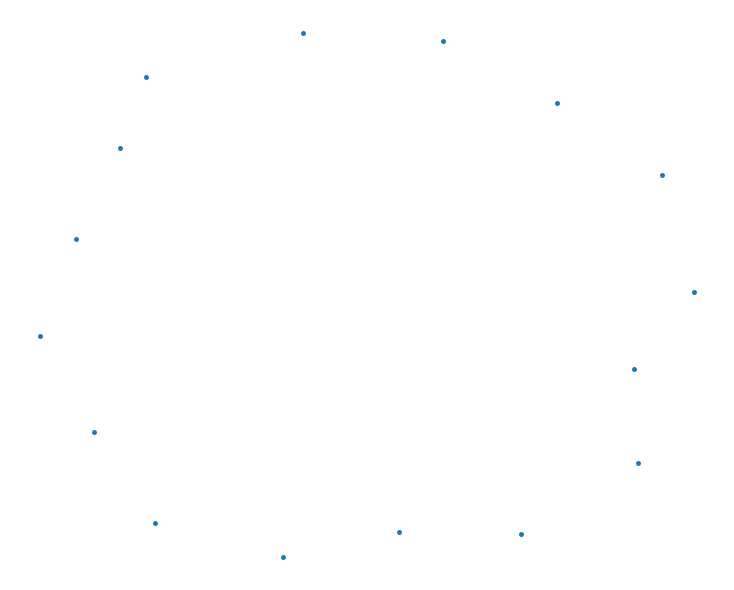

In [36]:
figure(figsize=(10, 8))
nx.draw(G, node_size=15)

In [37]:
for entities in topic:
    if len(entities) > 1:
        for i in range(len(entities)-1):
           G.add_edges_from([(str(entities[i]),str(entities[i+1]))])

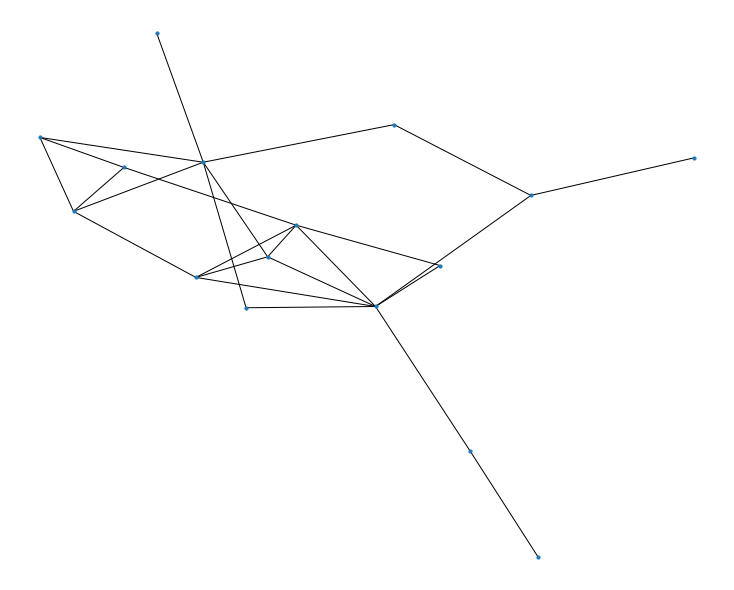

In [38]:
figure(figsize=(10, 8))
nx.draw(G, node_size=10)

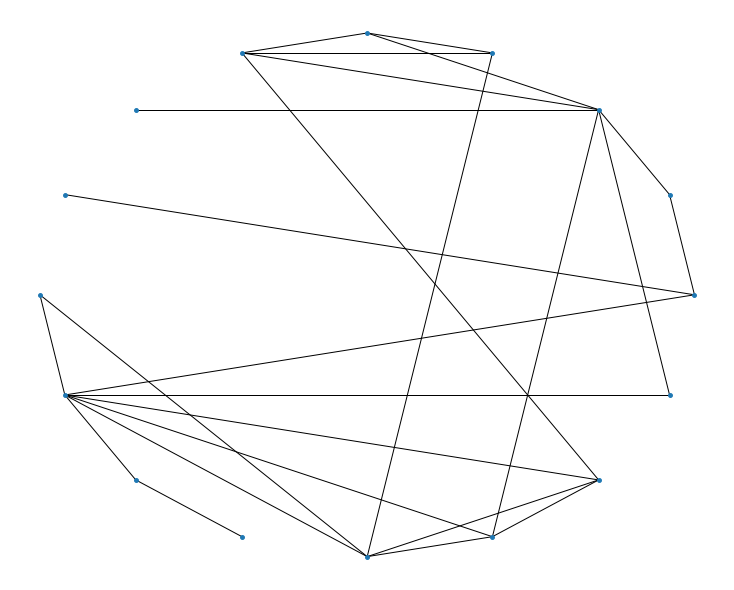

In [39]:
figure(figsize=(10, 8))
nx.draw_shell(G, node_size=15)

In [40]:
G.degree()

DegreeView({'s': 2, 'e': 7, 'l': 2, 'f': 1, 'c': 5, 'i': 4, 'n': 4, 'h': 2, 'a': 3, 'r': 2, 't': 6, 'o': 3, 'm': 5, 'u': 4, 'y': 1, 'D': 1})

In [41]:
max(dict(G.degree()).items(), key = lambda x : x[1])

('e', 7)

In [42]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [43]:
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('e', 7)
('t', 6)
('c', 5)
('m', 5)
('i', 4)


In [44]:
nx.write_gexf(G, "npr_coronavirus_GPE_50.gexf")

In [45]:
### 이하 자료는 개발하다 중단한 코드임....

## Sentence Segmentation using Spacy

In [46]:
import spacy
import re

nlp = spacy.load('en_core_web_lg')
boundary = re.compile('^[0-9]$')

def custom_seg(doc):
    prev = doc[0].text
    length = len(doc)
    for index, token in enumerate(doc):
        if (token.text == '.' and boundary.match(prev) and index!=(length - 1)):
            doc[index+1].sent_start = False
        prev = token.text
    return doc

nlp.add_pipe(custom_seg, before='parser')

In [47]:
text = """Physically, besides our Chinese complexion, there's one characteristic that has defined the Wei family: hair. Lots of it.I tie my bushy ponytail with two actual rubber bands, because normal hair-ties keep breaking\u2014and still, it whacks my face when playing tennis. My brother never wears shorts on first dates, to hide his hairy legs. And since I was young, I've loved ruffling my mom's abundant hair.That changed my junior year, when my mom came home with her hair shaved off.I could barely recognize her. It was in that moment that the reality of her breast cancer hit me. I felt compelled to do anything to help her. To be strong for her. I held her close and somehow I knew we were going to be okay.Her cancer made me step up as a daughter. I did things for her out of love that I would have never done for myself. When her joints ached, I scoured the internet to find comfortable shoes for her. When she needed exercise but was too tired, I did leg lifts with her in bed.After a few cycles of chemo, my mom's blood counts were low. When she smelled her once-favorite foods, she wanted to throw up. But I knew she needed her nutrition. I asked the school's cooking teacher for recommendations. She gave me a whole cookbook of just soups, and I experimented at home with new flavors, ranging from minestrone to broccoli-cheddar, unusual to our Chinese cuisine. Mom's next blood test results showed her counts increased. I quit the tennis team to care for my mom. Tennis had been my first identity in high school. It shaped my work ethic and taught me resilience in the face of hard losses. But during tennis season, when my mom went through her toughest chemotherapy sessions, I knew I had to be there for her. In a way, tennis was an artificial environment to practice for the real challenges of life. I saw more powerful ways to use what the sport had taught me. My mom needed me more than my team did, and I needed more time with her.Mom's cancer taught me that each moment was important. I'll remember planting kisses on my mom's face as I tucked her into bed. I'll remember cleaning up her vomit with my dad in the small bathroom, working together with gloved hands. I'll remember telling a classmate about my mom's cancer, and her response: 'I haven't told anyone. I have leukemia. Now I realize I'm not alone.' Through laughter and conversations about family struggles, hospital visits, and favorite songs, we made a deep connection. I realized that there were important moments not just with family, but also with the people around me. I wanted to appreciate them all.As a journalist, I hoped to make moments important for others too. Where the boys basketball team saw their usual post-game meeting in the locker room, I saw a story of how a team became a family. Where a math teacher didn't think twice about his doodling, I saw a hidden talent worth featuring. I found so much inspiration in learning about what made people uniquely themselves: their stories, ideas, opinions. I wanted to capture those unique stories of my school, for people to feel important and heard. I found my new identity, a student journalist: a listener who sees the world with curiosity, compassion and purpose\u2014someone who helps empower others.This summer, I donated 9 inches of my ponytail. I imagine the strands bringing confidence to someone I'll never know. As I helped my mom pick out a wig to wear when returning to work, I saw small hairs beginning to grow. I saw resilience.As our hair grows, I will too. Smiling through challenges and learning from them. Appreciating the people around me. Making every moment important.When I saw the iconic photo of Alan Kurdi washed ashore, I cried. After class, I stayed behind with my friend Meghana, trying to grasp the complexities of the Syrian Refugee Crisis, wishing we could do something. Online, Meghana and I discovered Paper Airplanes: a non-profit that connects students with Syrian refugees to tutor. We established Lynbrook's chapter, inviting students to join through social media. Twenty committed to help.Through Paper Airplanes, I tutored a 17-year-old Syrian refugee living in Turkey, who wanted to take the TOEFL to attend college. Helping him grow from incomplete English sentences to his first essay filled me with pride. I wanted to be the best tutor possible for him, and I saw the other twenty tutors feel the same about their own students. But many were intimidated to teach English learners for the first time.I set out to help, reading education blogs and drawing from my experiences to create tutoring-workshops such as 'Spicing up Grammar Lessons' and 'Fun Writing Activities.' I also led discussions where we devised ways to improve lessons and empower our students. For example, Zahra's student spoke Arabic during lessons because she was afraid to make mistakes in English. Together, we discussed how to create a safe space so students felt comfortable.Initially, some tutors didn't quite understand the realities of the Syrian Refugee Crisis. When some students couldn't be reached due to their unstable lives, I encouraged them to use it as a learning opportunity to understand what being a refugee meant. This year, we've expanded our leadership team and number of tutors and plan to spread more awareness about refugee and immigrant rights through speaker events. It has been so fulfilling to see the growth in our tutors: not only have they gained confidence in their leadership abilities, but they've also formed lasting friendships with their students and personal connections to this global issue.The Syrian Refugee Crisis remains a daunting issue to solve, but I believe through education and empathy, we can make a meaningful difference and make the world feel more connected.My junior year, creative problem solving took on a new meaning for me when my mom was diagnosed with breast cancer. To help with the challenges arising from her chemotherapy, I found solutions with creativity and love.Chemotherapy killed my mom's taste buds, and her once-favorite foods became difficult to swallow. I knew she needed her nutrition; I thought, if she were to try foods that she hasn't eaten before, she would have no prior expectation of their flavor, so she wouldn't be as disappointed. Every night, I would cook her different foods from different cuisines. I was ecstatic when she enjoyed them a lot more.However, another problem arose. A few hours after eating her meals, she would become nauseous and vomit her food, undigested. Her doctor told her this was normal. I knew vomiting was a side effect of chemotherapy, but I refused to accept that there was nothing I could do about it. Exercising, I thought, could be a possible solution. If she moved around, I thought, it could help my mom's body actively digest food. I knew this wouldn't solve the entire problem, but I hoped it would make a difference. So, I'd go on walks with my mom to encourage her to move around, and bought her new, comfortable shoes when her feet were swollen. As she had more chemo treatments, she became too tired to get out of bed. I created a workout for her to do in bed, consisting of leg lifts, crunches (with me holding down her legs), and arm circles \u2014 all done without standing up. The exercise did help my mom's digestion. It also helped her in ways I didn't imagine: going on walks helped her calm her mind, and exercising together in bed gave us another way to bond together. An act of creativity not only brought a solution to a problem, but it also created happy memories. In taking care of my mom, I've learned to use creative problem solving to help others, and to face challenges with positivity and resilience.I'm fascinated by the interdisciplinary potential of computer science. Beyond data structures and algorithms, it's about solving problems creatively.When I entered high school, I started teaching myself through MIT's OpenCourseWare, working my way through problem sets with Python. In sophomore year, I took C++ courses at Foothill College. In addition to teaching me about object-oriented programming and pointers, my professor introduced me to the 3 P's: Patience, Practice, and Perseverance. Today, I strive to use the 3 P's in everything I do.My junior year, I realized technology could positively impact the way our school newspaper told stories, making them more compelling and accessible. As a student journalist, I saw that our community was filled with powerful stories that couldn't fit in a monthly paper. So, I decided to build a website to put our stories online. The website increased our viewership, allowing parents and alumni to engage with our stories. When several staffers wrote online stories relating to the #MeToo movement, I compiled the stories together and coded our publication's first multimedia package. It was an unique way our audience could experience a story, and I want to continue combining code and journalism to present powerful stories: from analyzing data for investigative stories to creating multimedia projects. When my mom's breast cancer was diagnosed after she experienced symptoms, I wondered whether a machine-learning-based model could have detected her cancer during an annual mammogram months earlier, instead. I immersed myself in neural networks, activation and loss functions, weights and biases, pulling together Python libraries to create a model that can recognize breast cancer in mammograms. I was so excited when, uploading my mom's mammogram to the model, I watched it circle her cancer's location in red. I hope to continue this research in other fields, finding meaning of the world's piles of data.Computer science is more than an academic subject: it's a way to search for new solutions, to expand possibilities. I want to study both computer science and the humanities to tell compelling stories as a journalist and better solve problems that impact the people around me.As a student journalist, I've learned that every person has a meaningful story to tell. Sharing and listening to stories can make us more open-minded, compassionate, and understanding of the people and the world around us. I seek out the stories of others, listening and sharing them with compassion.Stories bring awareness and create tangible change. My co-editor and I filmed a documentary on the wave of youth activism following the Parkland shooting to capture this movement for our community; at our first screening, we distributed voter-registration forms. When I collected data on students' experiences with bullying for a feature, the principal shared it at an all-staff meeting about school culture. I wrote an editorial that brought attention to the school's lack of emergency preparedness; the following school year, administrators conducted a Run, Hide, Defend drill. I interviewed a student at our school, who showed me how one person's courage to speak out can spark a movement. He told me about his loneliness and depression, which led to drug use and an intentional overdose his senior year. He wanted others to hear his story: to break the stigma around mental health in our community, to help others realize they're not alone, to spread hope and positivity. I spent countless hours writing the story, knowing I had to do it justice. I hoped it could inspire others the same way it inspired me. The story created a ripple effect. Our newspaper's online traffic tripled, surpassing 1,200 views for the first time. At our school, mental health issues are apparent, but rarely talked about. The story led to students having more open conversations about mental health. A teacher said it reminded him of why he became a teacher. A parent translated the article into Chinese and shared it in a group-chat with hundreds of parents, where they discussed how to address mental health with their own children.Stories acknowledge the voices of individuals, bringing the community together. I want to use journalism to make people feel heard, to empower others to share their voices and to inspire positive change.Although I joined the school newspaper on a whim and had previously planned to take AP Computer Science, journalism has become a core part of the person I am today. To me, journalism is a way to see the world with curiosity and compassion. Everyone has a story, and journalism allows me to hear those stories \u2014 to learn more about the people around me and be inspired by them. Journalism tells people, 'Your story matters,' and I want to be someone who helps the community by showing people that their voices are important. I also love the fast-paced nature of journalism, how it pushes me to tap into abilities I never knew I had, like produce a high-quality story on a tight deadline.Journalism has taught me to experience the world with an open mind, to soak every moment in \u2014 because wherever you go, there's an exciting story.It's Tuesday lunch. My club officers and I begin with a presentation about spicing up grammar lessons for English learners. Then, the classroom lights up with discussion, each tutor sharing about their student. 'He's so motivated!' says Sanjana, describing her 17-year-old student who wants to fight for peace in Syria. Zahra poses a question; her student from Saudi Arabia speaks Arabic during lessons because she is afraid to make mistakes in English. 'What do you guys think I should do?'Together, our group come up with ways to help her student feel more comfortable during the online tutoring sessions.Two years ago, near the end of my sophomore year, this community of 30 people was only 3: my history teacher, my classmate, and me. Our world history teacher opened my eyes to the Syrian Refugee Crisis and the political, economic, and social factors that made it so difficult to solve. My classmate and I would stay in her classroom after school just talking about it, wishing there was something we could do.Then, I learned about Paper Airplanes \u2014 an organization that connects English-speaking students with same-aged Syrian refugees to tutor. I told my friend about it, and last year we implemented it at Lynbrook. Through tutoring, we've learned to become better communicators and realized that, despite our students' varied life experiences, we're still the same: teenagers with big dreams who just want to have fun.When I see a new club member begin tutoring, I'm filled with hope and excitement for them, eager to help them learn more about the world and make a new friend. This community shares a love for education, helping others, and immersing ourselves in world issues, trying to make a difference, instead of turning a blind eye to problems too difficult to solve.Why that College or School?Computer science isn't just writing code to create a project; it's a way of assessing problems and devising solutions for them. This way of thinking \u2014 of breaking large problems into smaller, manageable pieces that can be solved by teams of people, of constantly coming up with ways to improve \u2014 can be applied to so many fields, from medicine to education to journalism.At the University of Michigan, I hope to double major in computer science and communications to create systems that allow the stories we share to have a wider impact. Last year, I created a website for our school newspaper because I wanted to tell more stories than could fit in a monthly 16-page paper. I realized that technology can bring a story to life in exciting ways. From multimedia projects to data analysis and visualization, technology allows stories to leave an even larger impact on audiences and can be used to create lasting change. It empowers people to share their voices. That's what technology should be about: empowering others. I want to be someone who can use her technical skills to empower other people to share their stories and show them that their voices matter.I'm ecstatic that the University of Michigan provides such a thorough curriculum to explore these ideas. Courses such as EECS 554, Introduction to Digital Communication and Coding, would help me build platforms that innovate the way people share stories: allow them to reach more people and expand the potential of multimedia. COMM 495, Future of Digital Media, would connect me with peers who also aspire to bring communities together with technology and stories, and together we could come up with new ways to do so.Moreover, I hope to be part of The Michigan Daily staff to incorporate my love for computer science and journalism to share the stories of the people around me, through gathering data for investigative projects and using web and multimedia tools to immerse an audience into a story.I want to study at the University of Michigan because of how much the school embraces the idea of 'interdisciplinary.' I want to attend a school that embraces such a philosophy because computer science and communications are inherently interdisciplinary; computer science is applicable to so many fields and stories can be told about any subject and any person. I hope to minor, if not take classes in, urban studies and crime & justice to help me better understand the communities I want to serve after graduating. Taking classes as part of Michigan's data science major will give me the skills needed to pursue data journalism, a way to tell powerful stories with both numbers and words that can contribute to even more impactful investigative reporting.As a student, I hope to learn more about my community by immersing myself in it and giving back through programs such as the Prison Creative Arts Project.University of Michigan's focus on 'it's not just a major' and community outreach excites me because I will get to learn about the world in an interdisciplinary way and see the issues I care about through multiple perspectives.Idea or experience that makes you excited about learningI stared at Big Hero 6 on the screen, a substitute teacher's attempt to control a class of 8th graders. Fascinated by futuristic San Fransokyo, I fell in love with Baymax and the way he could help others\u2014with super strength and knowledge about every medical procedure. That day I knew I wanted to learn computer science: to push possibilities like Tadashi, Baymax's designer, to create something to help people in ways never before imagined.When my mom was diagnosed with cancer, I wondered whether machine learning could have detected her cancer during an annual mammogram, instead of months later, after she felt symptoms. I had to find an answer.I immersed myself in this new world of neural networks, activation and loss functions, weights, and biases. The articles at first felt like reading a foreign language, pushing me to further understand those concepts. I was thrilled, in that moment when all the calculus concepts I learned in class clicked together with the project, and I rushed to explain it to my mom and brother.After pulling together Python libraries and making my own model, I was ecstatic when I uploaded my mom's mammogram and saw it circle the location of her cancer in red.I want to apply this research to other fields such as education and journalism, using the potential of machine learning to find meaning in the piles of data in the world. The future is now. And I can be a part of creating it.Note to future roommateDear Roommate,To me, mornings and nights are special, and I'm so excited to share these times of the day with you! Mornings are filled with possibility\u2014a chance to build upon who you were yesterday\u2014and nights are a chance to reflect. Both are times to appreciate the present. I started morning runs this year. Will you join me? A friend created a workout for his sports science class, and one for me too. His random idea made me realize how awesome it feels to do at least one thing you're proud of every day. In my favorite Japanese drama Miss Pilot, two female pilot trainees go on runs in the morning, encouraging each other, and suddenly, the whole dorm joins. Could that be us?At night, do you want to share bedside books? I'll bring my copy of The Things They Carried, my favorite quotes highlighted in blue. What things do you carry? I carry the quirk of nodding a lot when I listen. I first noticed it watching myself on the school talk show. I do it because I'm listening to you! When I do, there's no one more important to me.From my childhood, I carry my stuffed panda and my excitement over the weirdest things, like airplanes. What gets you excited like a little kid?When two pilots meet before their flight, it's usually for the first time\u2014like us. We're the pilots for our college journey. I can't wait for the experiences we'll carry together.PatriciaSomething meaningful to you and why'I overdosed on purpose,' he* said, 'When I woke up in the hospital, I saw my mom crying next to me. I finally realized life is worth living.'I sat next to him, listening intently. In that moment, there was no one more important. HIs words reminded me that every person is a world in itself, wrapped in stories, experiences, and emotions, that, when shared with another person, gives them a new perspective. His world affirmed the importance of empathy and compassion. I was in awe of his courage and strength, grateful that I got to witness it.My duty now was to do his story justice. I owed it to him, who wanted it told. If the story could help one person, it would have been worth it.After I published his story, a ripple effect started. A teacher said he was reminded of why he became a teacher. A parent translated the story into Chinese; online, it sparked a conversation about mental health among hundreds of parents who often shied away from the topic.I'll forever carry his story with me. Today, the community carries his story, too. They carry his message to be kind and judge less\u2014to acknowledge the stories in the people around them. People's stories are meaningful because they stop you in your tracks, compelling you to step inside someone else's shoes and emerge more open-minded and compassionate. His showed me the power one story has to start a movement."},{"index":1,"personal_essay":"I stared at Big Hero 6 on the screen, a substitute teacher's attempt to control a class of 8th graders. Fascinated by futuristic San Fransokyo, I fell in love with Baymax and the way he could help others\u2014with super strength and knowledge about every medical procedure. That day I knew I wanted to learn computer science: to push possibilities like Tadashi, Baymax's designer, to create something to help people in ways never before imagined.When my mom was diagnosed with cancer, I wondered whether machine learning could have detected her cancer during an annual mammogram, instead of months later, after she felt symptoms. I had to find an answer.I immersed myself in this new world of neural networks, activation and loss functions, weights, and biases. The articles at first felt like reading a foreign language, pushing me to further understand those concepts. I was thrilled, in that moment when all the calculus concepts I learned in class clicked together with the project, and I rushed to explain it to my mom and brother.After pulling together Python libraries and making my own model, I was ecstatic when I uploaded my mom's mammogram and saw it circle the location of her cancer in red.I want to apply this research to other fields such as education and journalism, using the potential of machine learning to find meaning in the piles of data in the world. The future is now. And I can be a part of creating it.The Stanford community is deeply curious and driven to learn in and out of the classroom. Reflect on an idea or experience that makes you genuinely excited about learning.Dear Roommate,To me, mornings and nights are special, and I'm so excited to share these times of the day with you! Mornings are filled with possibility\u2014a chance to build upon who you were yesterday\u2014and nights are a chance to reflect. Both are times to appreciate the present. I started morning runs this year. Will you join me? A friend created a workout for his sports science class, and one for me too. His random idea made me realize how awesome it feels to do at least one thing you're proud of every day. In my favorite Japanese drama Miss Pilot, two female pilot trainees go on runs in the morning, encouraging each other, and suddenly, the whole dorm joins. Could that be us?At night, do you want to share bedside books? I'll bring my copy of The Things They Carried, my favorite quotes highlighted in blue. What things do you carry? I carry the quirk of nodding a lot when I listen. I first noticed it watching myself on the school talk show. I do it because I'm listening to you! When I do, there's no one more important to me.From my childhood, I carry my stuffed panda and my excitement over the weirdest things, like airplanes. What gets you excited like a little kid?When two pilots meet before their flight, it's usually for the first time\u2014like us. We're the pilots for our college journey. I can't wait for the experiences we'll carry together.PatriciaVirtually all of Stanford's undergraduates live on campus. Write a note to your future roommate that reveals something about you or that will help your roommate\u2014and us\u2014get to know you better.'I overdosed on purpose,' he said, 'When I woke up in the hospital, I saw my mom crying next to me. I finally realized life is worth living.'I sat next to him, listening intently. In that moment, there was no one more important. His words reminded me that every person is a world in itself, wrapped in stories, experiences, and emotions, that, when shared with another person, gives them a new perspective. His world affirmed the importance of empathy and compassion. I was in awe of his courage and strength, grateful that I got to witness it.My duty now was to do his story justice. I owed it to him, who wanted it told. If the story could help one person, it would have been worth it.After I published his story, a ripple effect started. A teacher said he was reminded of why he became a teacher. A parent translated the story into Chinese; online, it sparked a conversation about mental health among hundreds of parents who often shied away from the topic.I'll forever carry his story with me. Today, the community carries his story, too. They carry his message to be kind and judge less\u2014to acknowledge the stories in the people around them. People's stories are meaningful because they stop you in your tracks, compelling you to step inside someone else's shoes and emerge more open-minded and compassionate. He showed me the power one story has to start a movement.Tell us about something that is meaningful to you, and why?In world history class, when I saw the iconic photo of little Alan Kurdi and his small shoes, I cried. After class, a friend and I stayed behind for hours talking to our teacher about the Syrian Refugee Crisis and its complexities, wishing we could help. We then created the Lynbrook chapter of Paper Airplanes, which pairs students with refugees to tutor. I tutored a 17-year-old Syrian refugee living in Turkey. I used empathy to guide my teaching, hoping that with every lesson, he enjoyed learning something new. I wanted to help him believe in himself. Watching him grow from writing incomplete English sentences to his first essay filled me with pride.The Syrian Refugee Crisis is so difficult to solve, but education, and more importantly, empathy, connect people, helping us see the common humanity in the issue and giving us hope and tools to see a better world.Briefly elaborate on one of your extracurricular activities or work experiences.Although I joined the school newspaper on a whim and had previously planned to take AP Computer Science, journalism has become a core part of the person I am today. To me, journalism is a way to see the world with curiosity and compassion. Everyone has a story, and journalism allows me to hear those stories \u2014 to learn more about the people around me and be inspired by them. Journalism tells people, 'Your story matters,' and I want to be someone who helps the community by showing people that their voices are important. I also love the fast-paced nature of journalism, how it pushes me to tap into abilities I never knew I had, like produce a high-quality story on a tight deadline.Journalism has taught me to experience the world with an open mind, to soak every moment in \u2014 because wherever you go, there's an exciting story.If you could only do one of the activities you have listed in the Activities section of your Common Application, which one would you keep doing? Why?It's Tuesday lunch. My club officers and I begin with a presentation about spicing up grammar lessons for English learners. Then, the classroom lights up with discussion, each tutor sharing about their student. 'He's so motivated!' says Sanjana, describing her 17-year-old student who wants to fight for peace in Syria. Zahra poses a question; her student from Saudi Arabia speaks Arabic during lessons because she is afraid to make mistakes in English. 'What do you guys think I should do?'Together, our group come up with ways to help her student feel more comfortable during the online tutoring sessions.Two years ago, near the end of my sophomore year, this community of 30 people was only 3: my history teacher, my classmate, and me. Our world history teacher opened my eyes to the Syrian Refugee Crisis and the political, economic, and social factors that made it so difficult to solve. My classmate and I would stay in her classroom after school just talking about it, wishing there was something we could do.Then, I learned about Paper Airplanes \u2014 an organization that connects English-speaking students with same-aged Syrian refugees to tutor. I told my friend about it, and last year we implemented it at Lynbrook. Through tutoring, we've learned to become better communicators and realized that, despite our students' varied life experiences, we're still the same: teenagers with big dreams who just want to have fun.When I see a new club member begin tutoring, I'm filled with hope and excitement for them, eager to help them learn more about the world and make a new friend. This community shares a love for education, helping others, and immersing ourselves in world issues, trying to make a difference, instead of turning a blind eye to problems too difficult to solve.Everyone belongs to many different communities and\/or groups defined by (among other things) shared geography, religion, ethnicity, income, cuisine, interest, race, ideology, or intellectual heritage. Choose one of the communities to which you belong, and describe that community and your place within it.Computer science isn't just writing code to create a project; it's a way of assessing problems and devising solutions for them. This way of thinking \u2014 of breaking large problems into smaller, manageable pieces that can be solved by teams of people, of constantly coming up with ways to improve \u2014 can be applied to so many fields, from medicine to education to journalism.At the University of Michigan, I hope to double major in computer science and communications to create systems that allow the stories we share to have a wider impact. Last year, I created a website for our school newspaper because I wanted to tell more stories than could fit in a monthly 16-page paper. I realized that technology can bring a story to life in exciting ways. From multimedia projects to data analysis and visualization, technology allows stories to leave an even larger impact on audiences and can be used to create lasting change. It empowers people to share their voices. That's what technology should be about: empowering others. I want to be someone who can use her technical skills to empower other people to share their stories and show them that their voices matter.I'm ecstatic that the University of Michigan provides such a thorough curriculum to explore these ideas. Courses such as EECS 554, Introduction to Digital Communication and Coding, would help me build platforms that innovate the way people share stories: allow them to reach more people and expand the potential of multimedia. COMM 495, Future of Digital Media, would connect me with peers who also aspire to bring communities together with technology and stories, and together we could come up with new ways to do so.Moreover, I hope to be part of The Michigan Daily staff to incorporate my love for computer science and journalism to share the stories of the people around me, through gathering data for investigative projects and using web and multimedia tools to immerse an audience into a story.I want to study at the University of Michigan because of how much the school embraces the idea of 'interdisciplinary.' I want to attend a school that embraces such a philosophy because computer science and communications are inherently interdisciplinary; computer science is applicable to so many fields and stories can be told about any subject and any person. I hope to minor, if not take classes in, urban studies and crime & justice to help me better understand the communities I want to serve after graduating. Taking classes as part of Michigan's data science major will give me the skills needed to pursue data journalism, a way to tell powerful stories with both numbers and words that can contribute to even more impactful investigative reporting.As a student, I hope to learn more about my community by immersing myself in it and giving back through programs such as the Prison Creative Arts Project.University of Michigan's focus on 'it's not just a major' and community outreach excites me because I will get to learn about the world in an interdisciplinary way and see the issues I care about through multiple perspectives.Describe the unique qualities that attract you to the specific undergraduate College or School (including preferred admission and dual degree programs) to which you are applying at the University of Michigan. How would that curriculum support your interests?'I overdosed on purpose,' he said, 'When I woke up in the hospital, I saw my mom crying next to me. I finally realized life is worth living.'I sat next to him, listening intently. In that moment, there was no one more important. He told me about his struggles with depression, the loneliness he felt when others judged him. His words reminded me that every person is a world in itself, wrapped in stories, experiences, and emotions, that, when shared with another person, gives them a new perspective. His world affirmed the importance of empathy and compassion.My duty now was to do his story justice. I owed it to him, who wanted it told. If the story could help one person, it would have been worth it.After I published his story, a ripple effect started. A teacher said he was reminded of why he became a teacher. A parent translated the story into Chinese; online, it sparked a conversation about mental health among hundreds of parents who often shied away from the topic. He showed me the power one story has to spark a movement.I'll forever carry his story with me. I'll forever carry the stories of every person I've had the honor to listen to. I'll forever keep listening, seeking inspiration and stories worth remembering\u2014they are everywhere.People's stories are essential to me; they stop me in my tracks, compel me to step inside someone else's shoes and emerge more open-minded and compassionate.What is something about yourself that is essential to understanding you?Lack of understanding divides us, which leads to discrimination and judgement of others. Truth often has multiple facets, yet most see just their own. By treating others with respect and taking time to understand instead of attacking others' viewpoints, we can help each other grow.What is the most significant challenge that society faces today?Ed Daly is taking matters in his own hands, and I want to see it. The flight attendants and I carry 57 orphans onto this unsanctioned flight. When we arrive in California from Vietnam, President Ford announces he's going to do more. This act of passion catalyzes a movement\u2014Operation Babylift.What historical moment or event do you wish you could have witnessed?Compassionate, determined, optimistic, confident, appreciativeWhat five words best describe you?"""

In [48]:
doc = nlp(text)
for sentence in doc.sents:
    print(sentence.text)

Physically, besides our Chinese complexion, there's one characteristic that has defined the Wei family: hair.
Lots of it.
I tie my bushy ponytail with two actual rubber bands, because normal hair-ties keep breaking—and still, it whacks my face when playing tennis.
My brother never wears shorts on first dates, to hide his hairy legs.
And since I was young, I've loved ruffling my mom's abundant hair.
That changed my junior year, when my mom came home with her hair shaved off.
I could barely recognize her.
It was in that moment that the reality of her breast cancer hit me.
I felt compelled to do anything to help her.
To be strong for her.
I held her close
and somehow I knew we were going to be okay.
Her cancer made me step up as a daughter.
I did things for her out of love that I would have never done for myself.
When her joints ached, I scoured the internet to find comfortable shoes for her.
When she needed exercise but was too tired, I did leg lifts with her in bed.
After a few cycles o

In [49]:
#test
#all_sentences_df['Sentences'].str.contains('mom')

In [50]:
#문장에서 특정문자열(topic)을 비교하여 존재유무 확인
paragraph_structure = []
for each_topic in topic:
    re = all_sentences_df['Sentences'].str.contains(each_topic)
    paragraph_structure.append(re)

In [51]:
paragraph_structure

[0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 189    False
 190    False
 191    False
 192    False
 193    False
 Name: Sentences, Length: 194, dtype: bool,
 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 189    False
 190    False
 191    False
 192    False
 193    False
 Name: Sentences, Length: 194, dtype: bool,
 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 189    False
 190    False
 191    False
 192    False
 193    False
 Name: Sentences, Length: 194, dtype: bool,
 0      False
 1      False
 2      False
 3       True
 4      False
        ...  
 189    False
 190     True
 191     True
 192    False
 193    False
 Name: Sentences, Length: 194, dtype: bool,
 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 189    False
 190    False
 191    False
 192    False
 193    False
 Name: Sentences, Length: 194, dtype: bool]

In [52]:
pd_paragraph = pd.DataFrame(paragraph_structure)

In [53]:
pd_paragraph

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
Sentences,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
Sentences,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sentences,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sentences,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
Sentences,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
pd_paragraph = pd_paragraph.replace({True: 1, False: 0})

In [55]:
pd_paragraph

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
Sentences,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Sentences,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentences,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentences,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Sentences,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#### 잉? 왜 이렇게 나오넹? 이것을 어떻게 문단으로 분석할까나???????

In [57]:
#문창 추출,  결과문장을 핵심단어 별로 구분할 것 
re_sentences = []
for i in topic:
    find_sent = findSentence(text, i)
    re_sentences.append(i)
    #print ("* keyword :", i)
    for sentence in find_sent:
        #print(sentence)
        re_sentences.append(sentence)

re_sentences

['self',
 'I did things for her out of love that I would have never done for myself.',
 "Beyond data structures and algorithms, it's about solving problems creatively.When I entered high school, I started teaching myself through MIT's OpenCourseWare, working my way through problem sets with Python.",
 'I immersed myself in neural networks, activation and loss functions, weights and biases, pulling together Python libraries to create a model that can recognize breast cancer in mammograms.',
 "Taking classes as part of Michigan's data science major will give me the skills needed to pursue data journalism, a way to tell powerful stories with both numbers and words that can contribute to even more impactful investigative reporting.As a student, I hope to learn more about my community by immersing myself in it and giving back through programs such as the Prison Creative Arts Project.University of Michigan's focus on 'it's not just a major' and community outreach excites me because I will ge

In [58]:
#출력문장들이 전체 문장에서 어디에 위치하는지 파악할 것
#출력문장을 데이터프레임 넣고, 전체 문장에서 동일한 문장의 위치를 찾으면 인덱스로 기록하고, 구분해볼 것
keyword_sent_df = pd.DataFrame(re_sentences, columns =["Sentences"])
keyword_sent_df[:20]

,Sentences
0,self
1,I did things for her out of love that I would ...
2,"Beyond data structures and algorithms, it's ab..."
3,"I immersed myself in neural networks, activati..."
4,Taking classes as part of Michigan's data scie...
5,I had to find an answer.I immersed myself in t...
6,I first noticed it watching myself on the scho...
7,HIs words reminded me that every person is a w...
8,I had to find an answer.I immersed myself in t...
9,I first noticed it watching myself on the scho...


In [59]:
#all_sentences_df의 문장을 keyword_sent_df와 비교해서 같으면 1 틀리면 0을 반환하여 1의 위치분포를 리스트에 담을 것
for item in all_sentences_df.iteritems():
    for item_ in keyword_sent_df.iteritems():
        if item == item_:
            print("paragraph")
        else:
            print("NaN")
    

ValueError: Can only compare identically-labeled Series objects

In [ ]:
#all_sentences_df의 문장을 keyword_sent_df와 비교해서 같으면 1 틀리면 0을 반환하여 1의 위치분포를 리스트에 담을 것
for item in all_sentences_df.iteritems():
    print (item)

In [ ]:
for item_ in keyword_sent_df.iteritems():
    print (item_)

In [ ]:

df = pd.DataFrame({'age': [24, 42], 'state': ['NY', 'CA'], 'point': [64, 92]})

In [ ]:
df

In [ ]:
for i in df.iteritems():
    print(i)
    print('======\n')